# Yahoo Finance API

In [1]:
from datetime import date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import time
import yfinance as yf

In [2]:
def fetch_sp500_table():
    """
    Fetches S&P 500 companies' ticker symbol, name, industry, sub-industry, etc

    Parameters
    ----------
    None

    Returns
    -------
    Pandas dataframe
    
    """
    
    sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    sp500.columns = [column.replace(' ', '_').replace('-', '_') for column in sp500.columns]
    sp500 = sp500.assign(Symbol_Name=sp500['Symbol'] + ' - ' + sp500['Security'])

    return sp500

In [3]:
def plot_stock_ticker(ticker: str, start_date: str, end_date: str):
    """
    Plots stock ticker historical trend

    Parameters
    ----------
    ticker: str
        stock ticker symbol
    start_date: str
        start date
    end_date: str
        end date

    Returns
    -------
    MATPLOTLIB line chart
    """

    df = yf.download(ticker, start_date, end_date, progress=False)

    sns.lineplot(
        data=df,
        x=df.index,
        y='Adj Close'
    )
    sns.despine()
    plt.xticks(rotation=90, fontsize=8)
    plt.title(f"Adj Close Price - {ticker}")
    plt.grid(visible=True)
    plt.show()

In [4]:
sp500 = fetch_sp500_table()

In [5]:
end_date = date.today()
start_date = end_date - relativedelta(years=10)
end_date_str = end_date.strftime('%Y-%m-%d')
start_date_str = start_date.strftime('%Y-%m-%d')

#### Plotting single stock ticker ("AAPL - Apple")

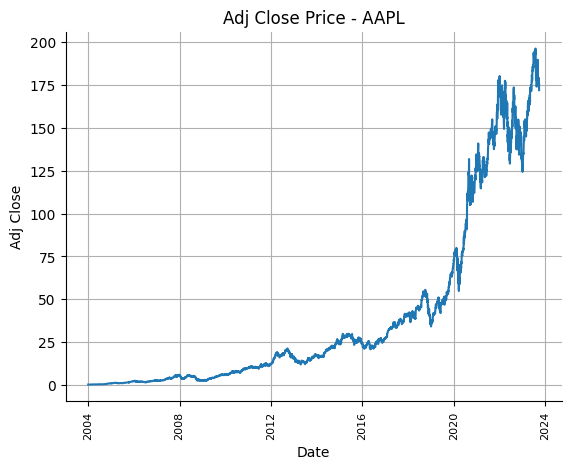

In [11]:
plot_stock_ticker('AAPL','2004-01-01',end_date_str)

#### Plotting multiple stock tickers for specific industry ("Information Technology")

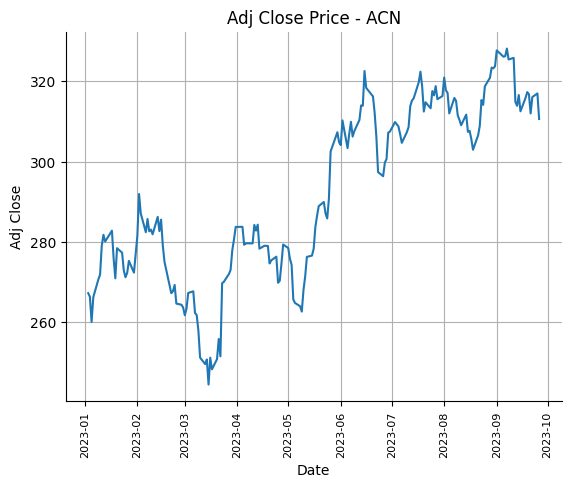

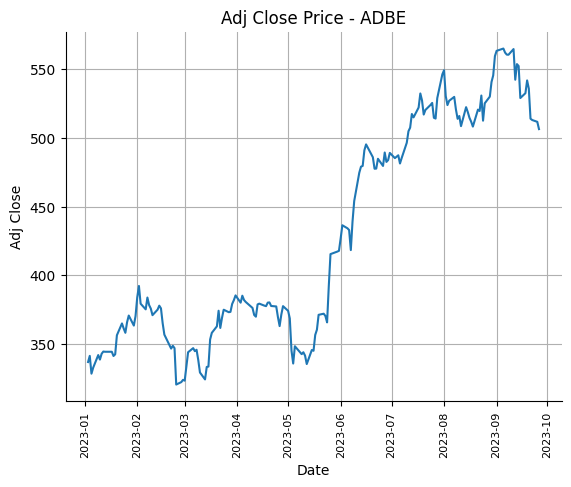

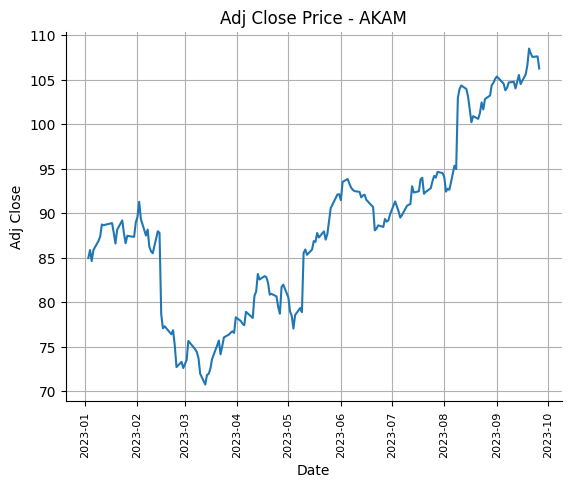

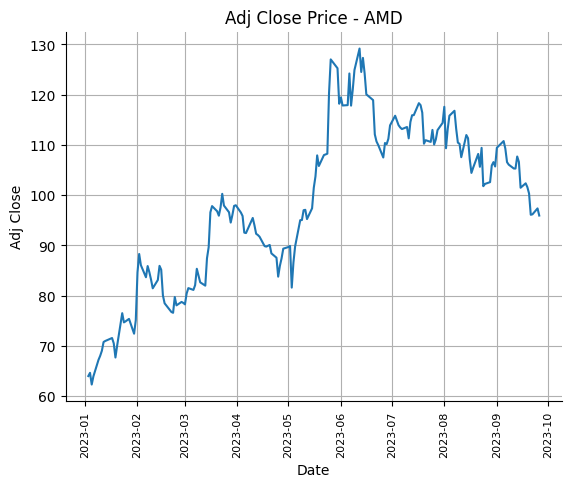

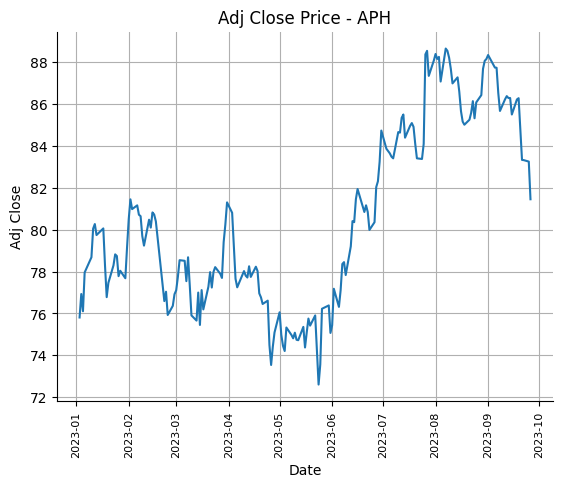

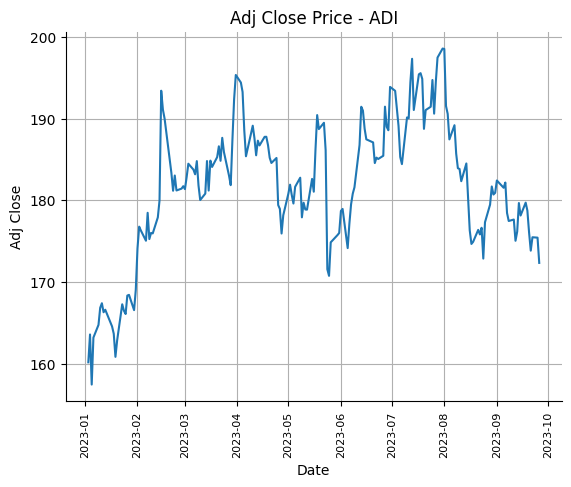

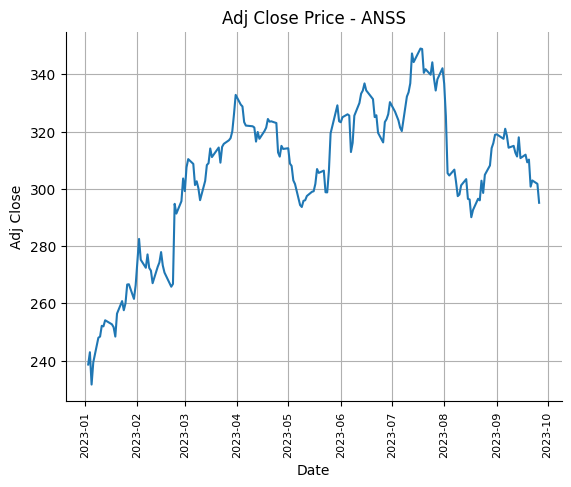

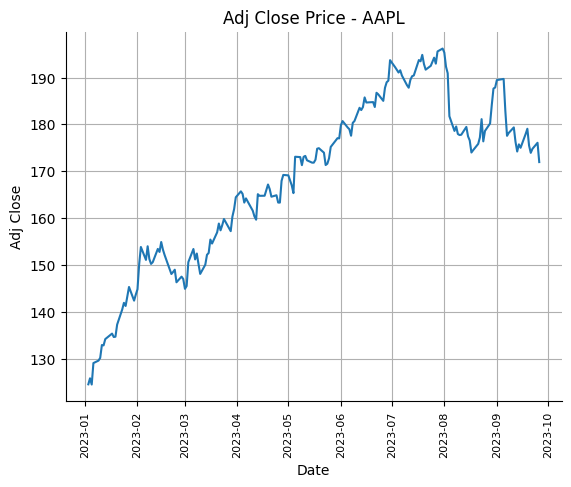

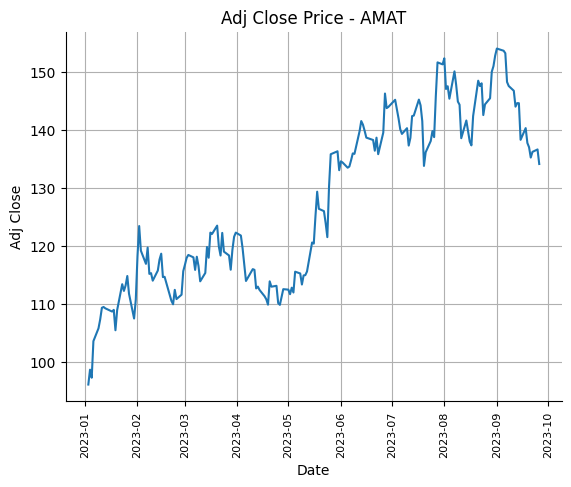

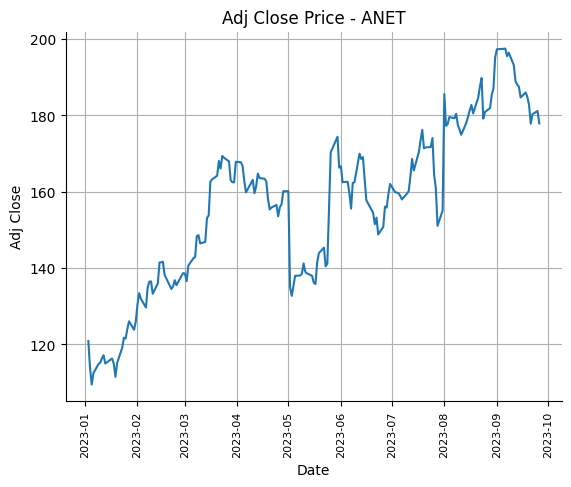

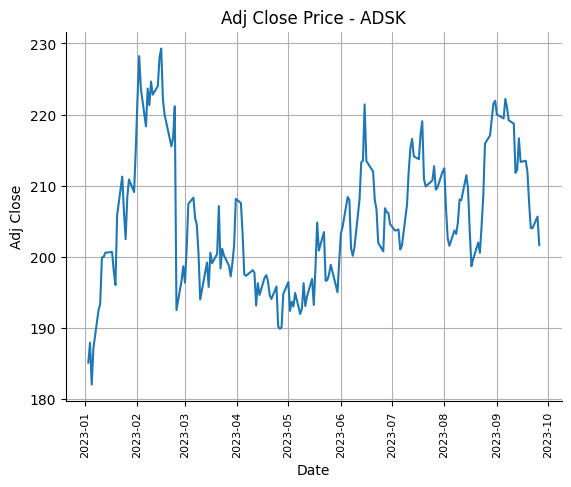

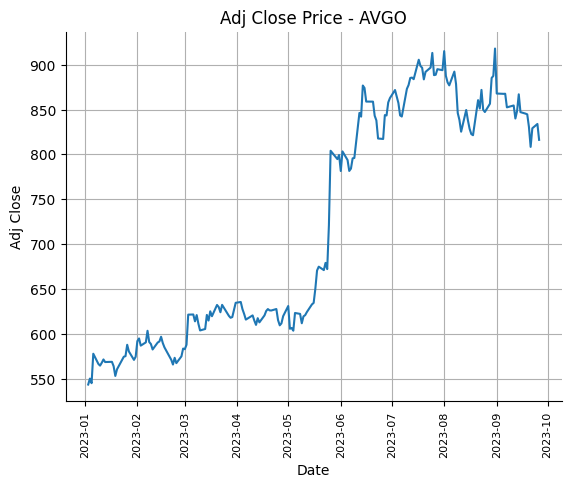

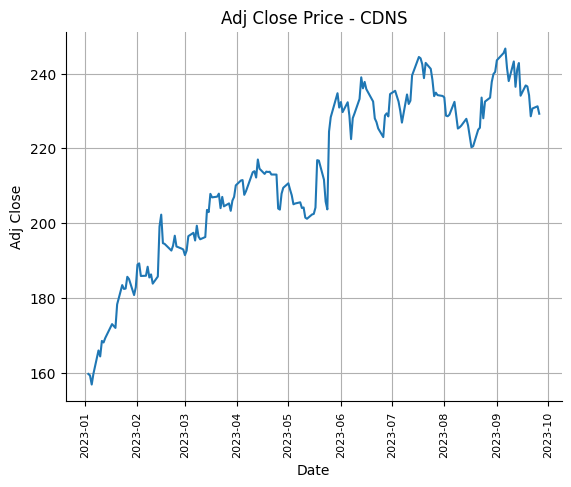

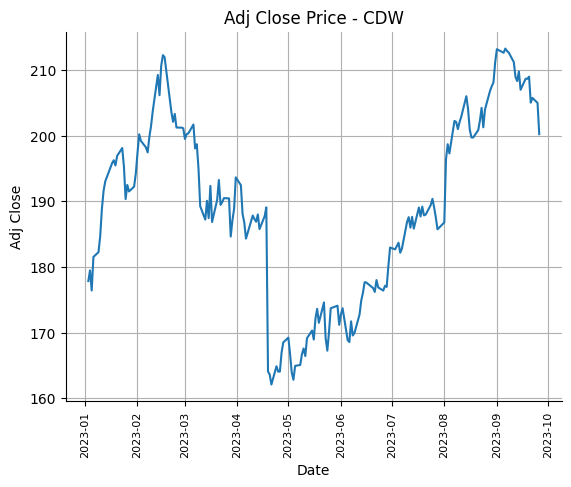

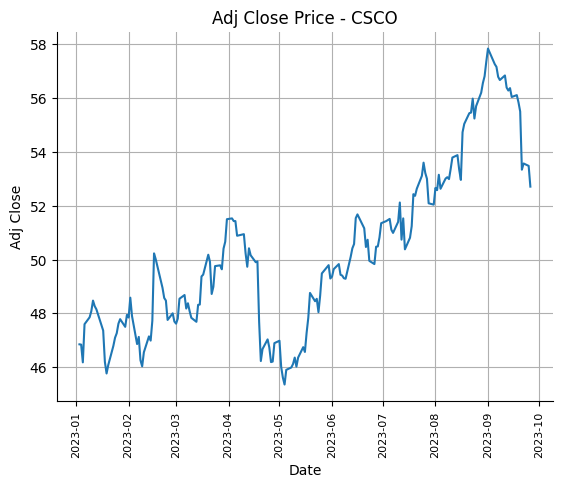

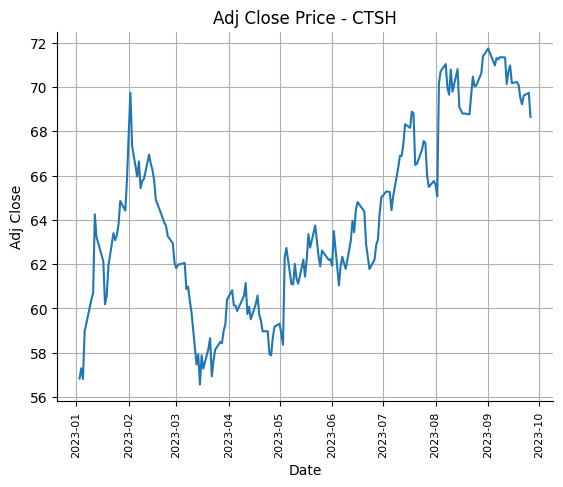

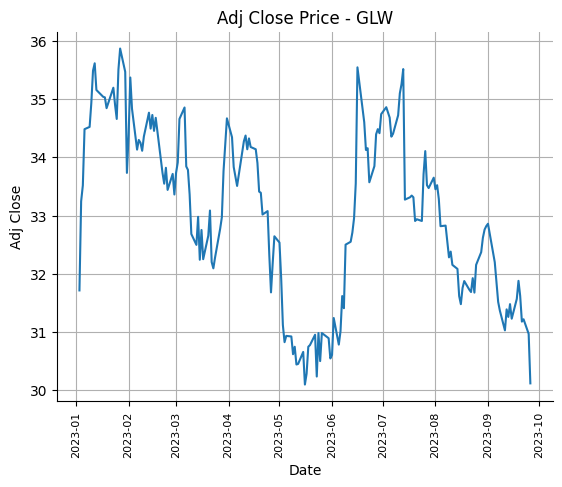

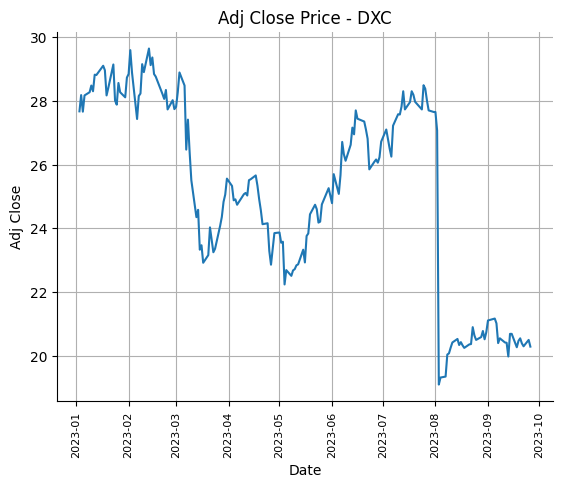

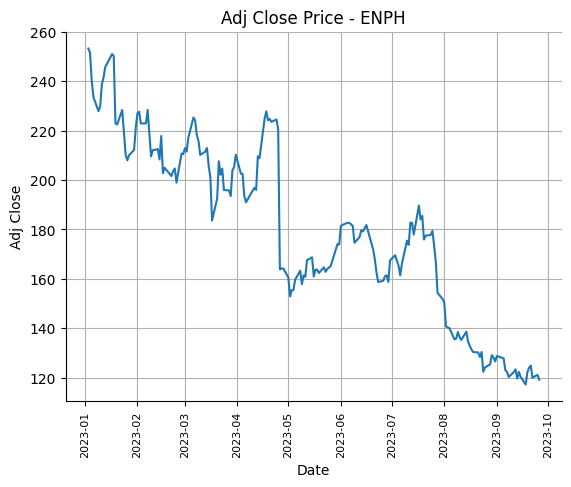

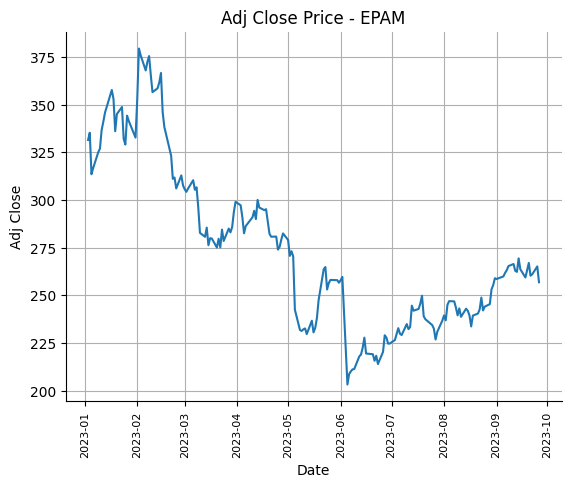

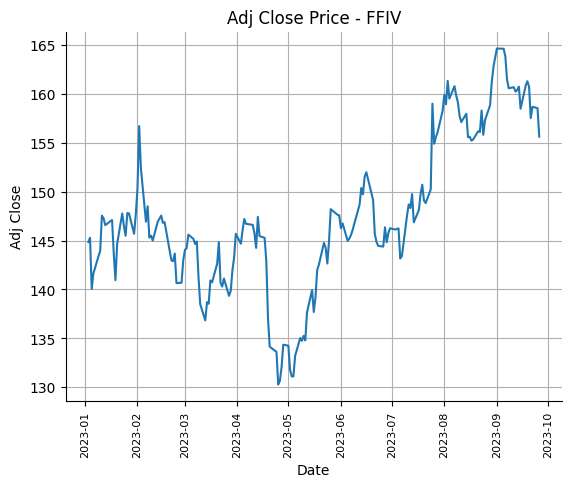

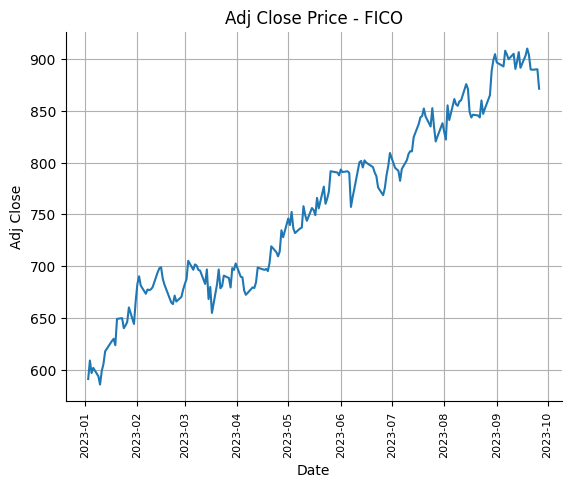

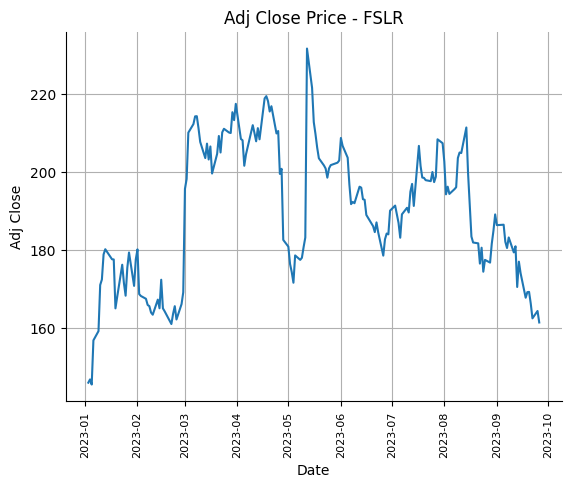

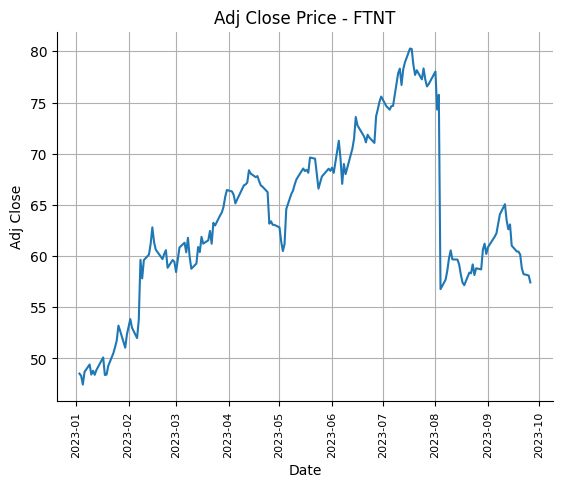

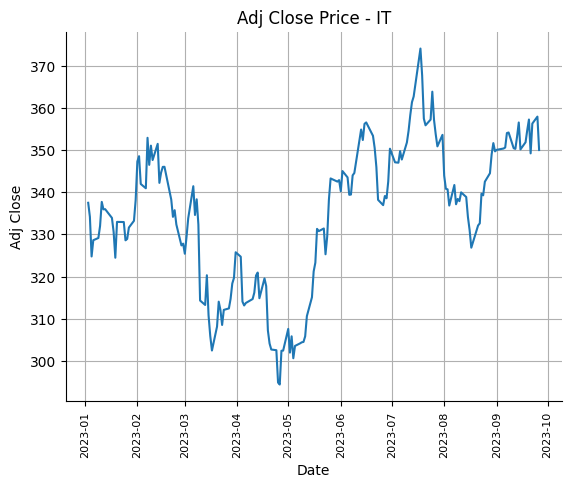

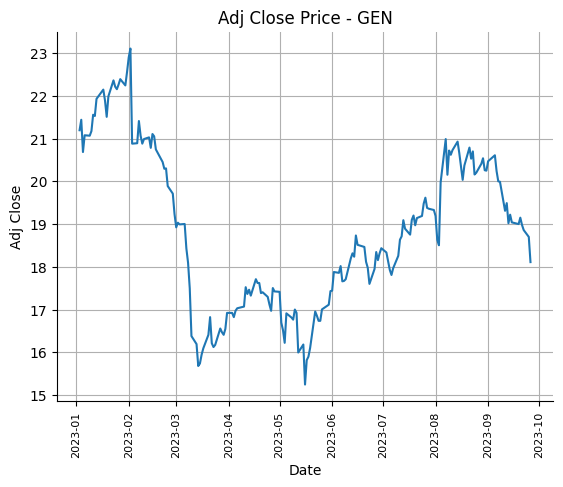

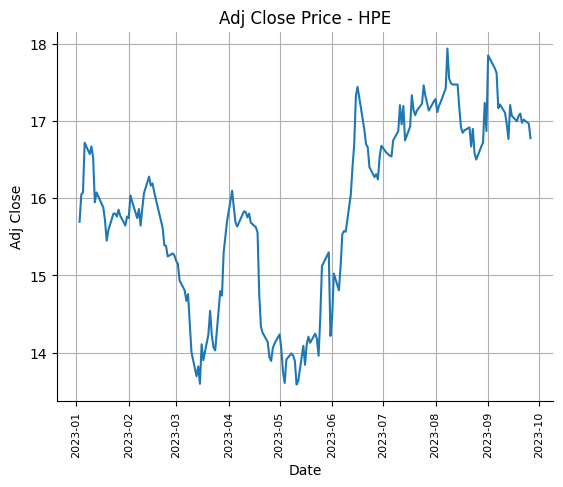

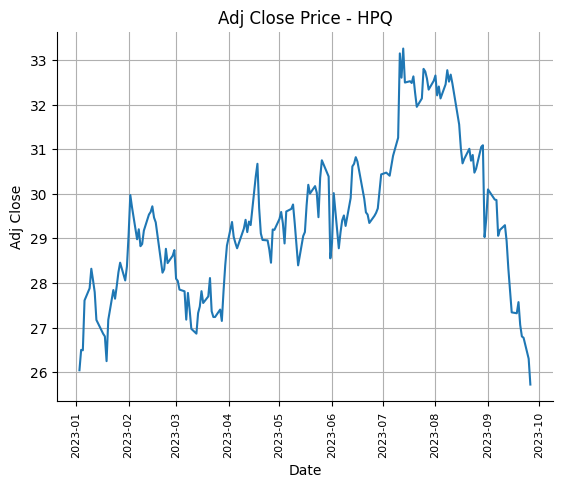

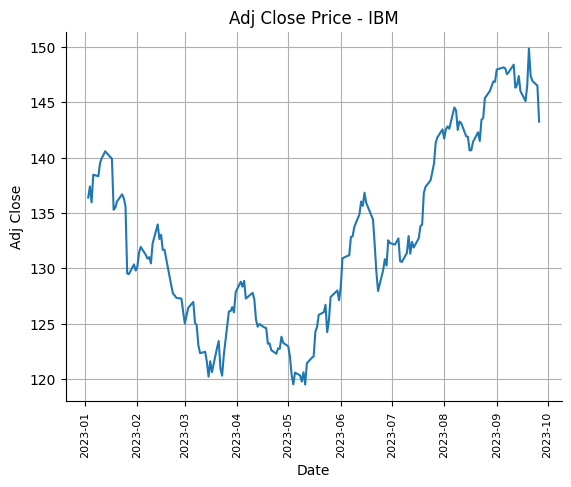

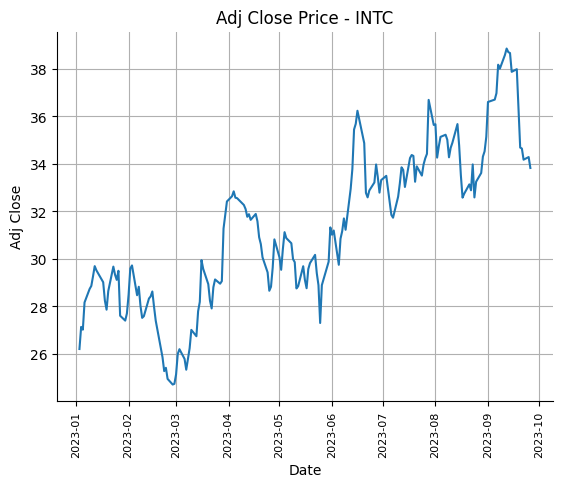

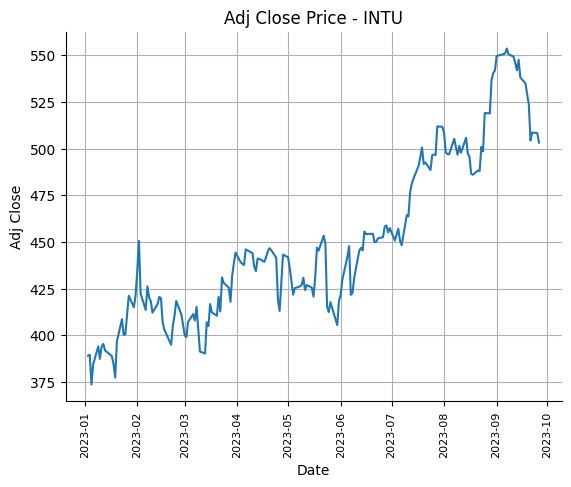

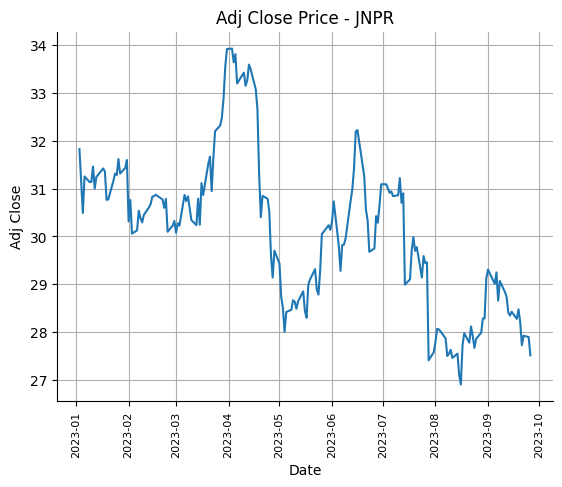

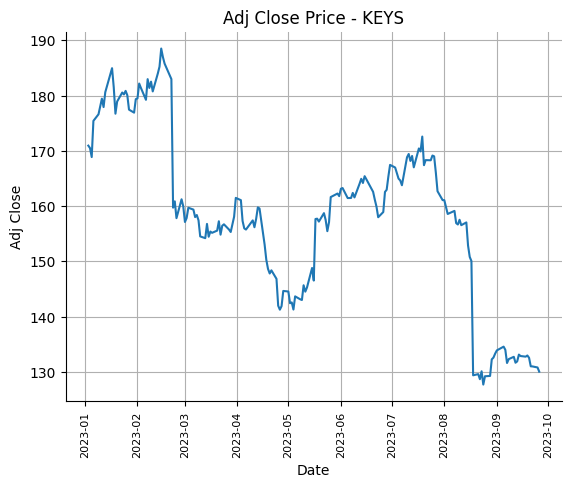

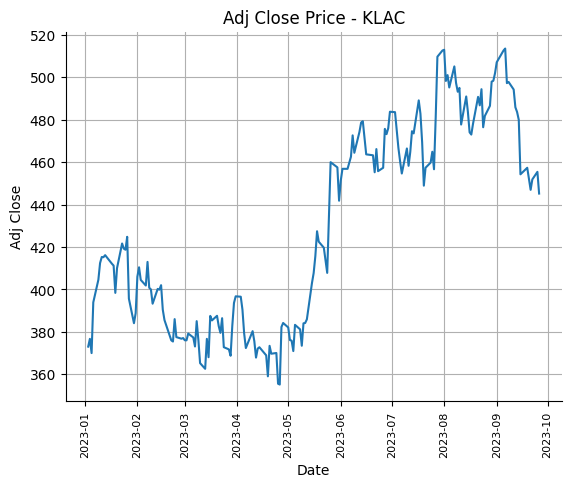

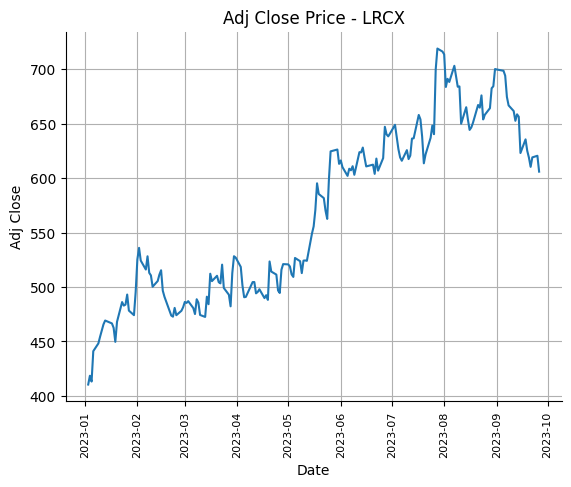

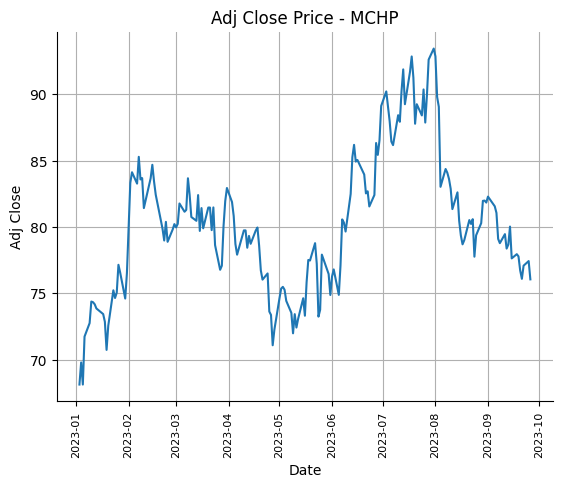

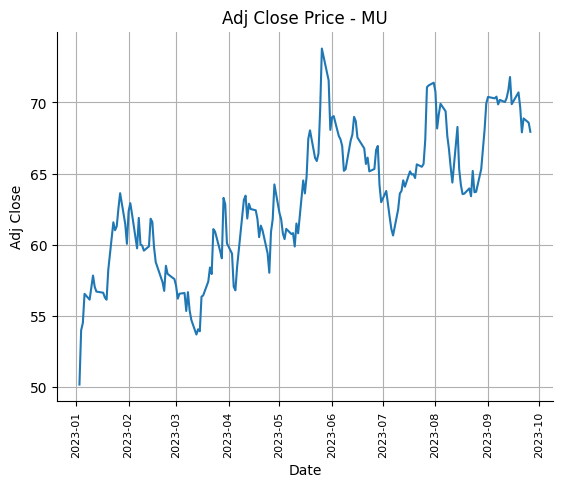

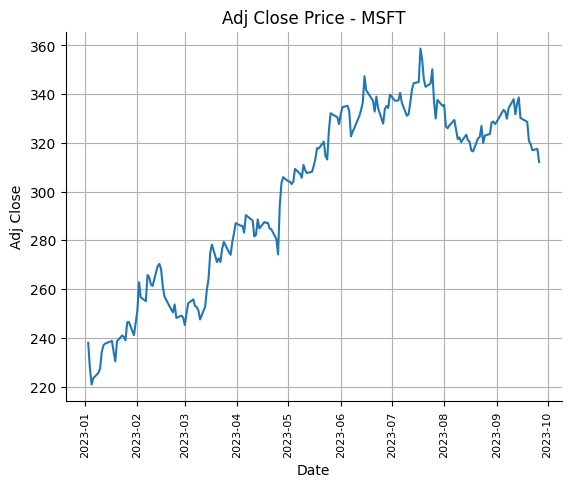

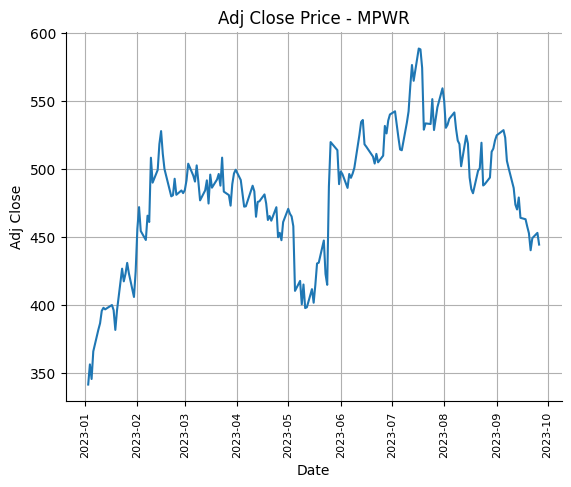

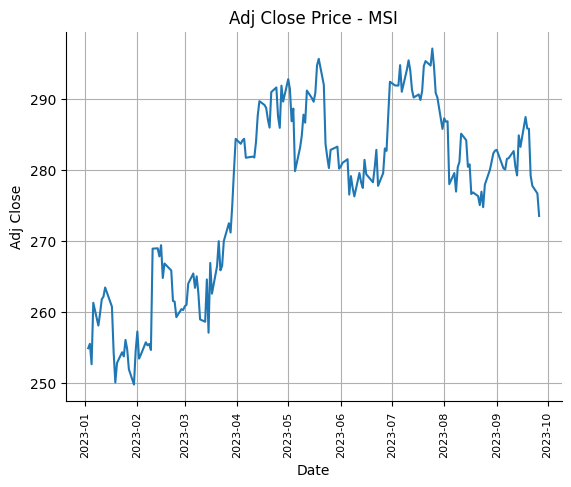

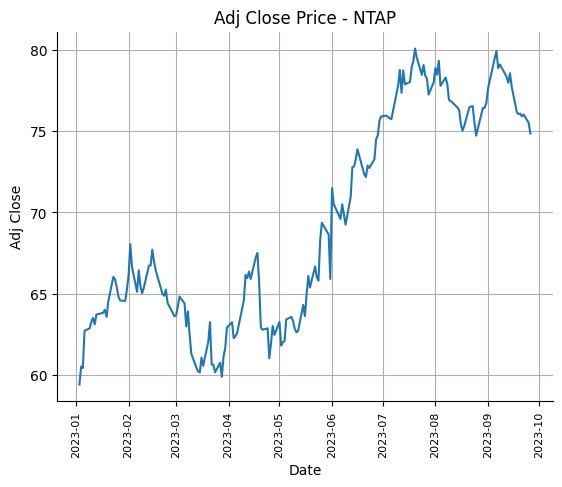

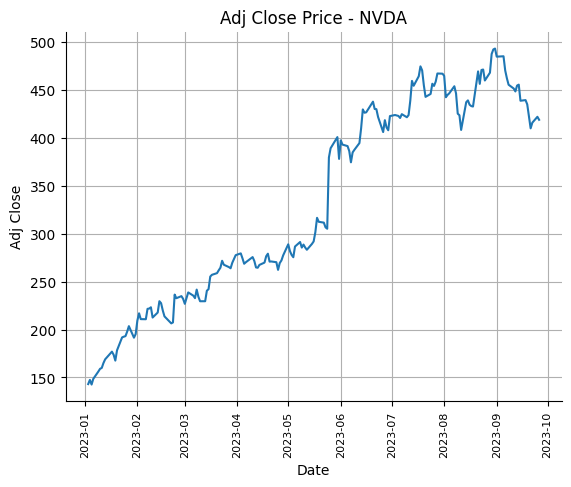

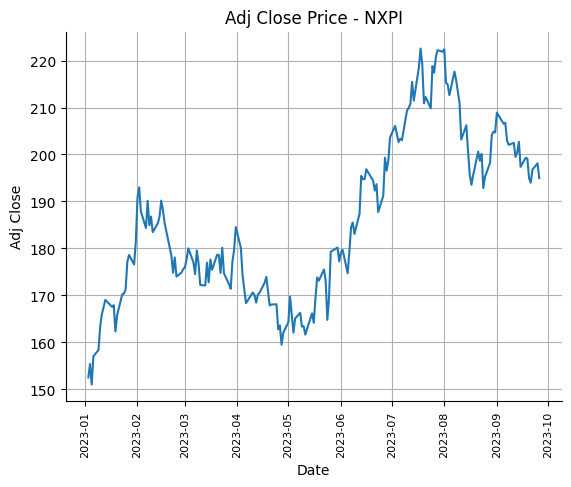

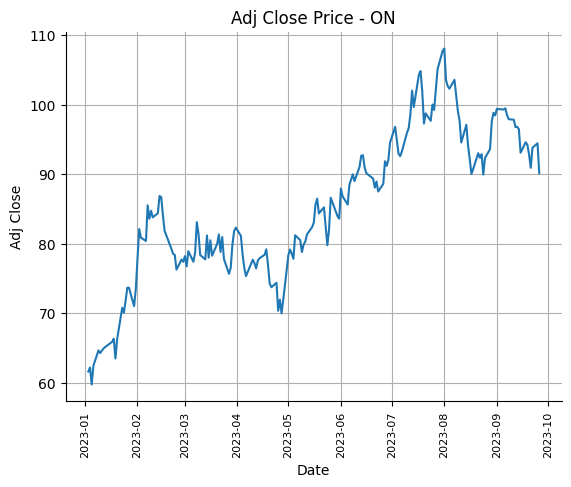

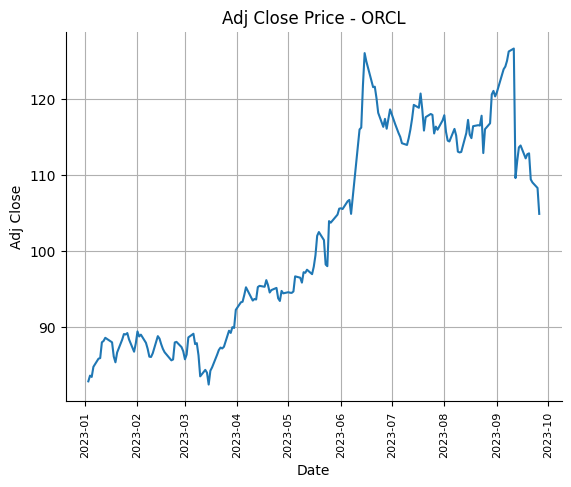

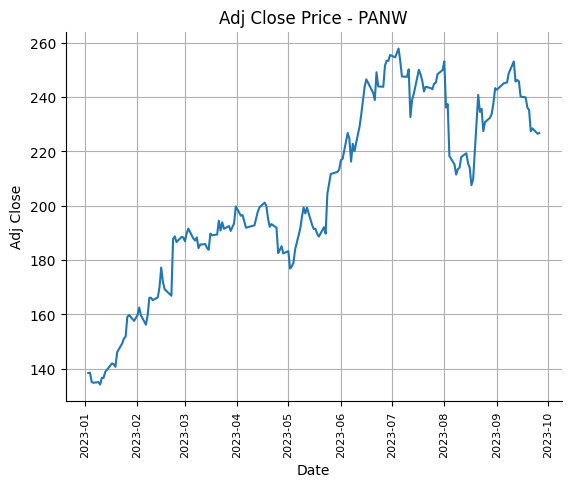

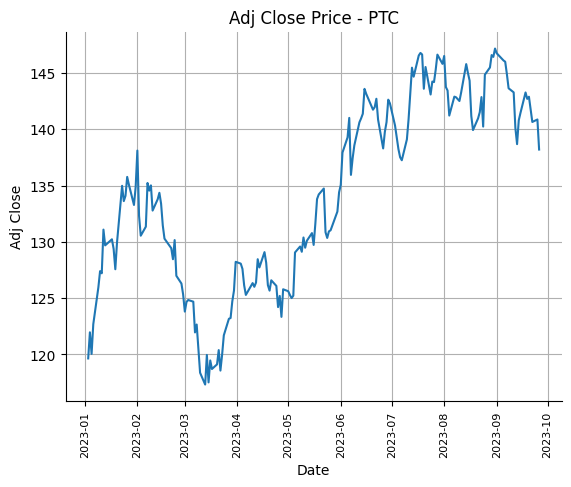

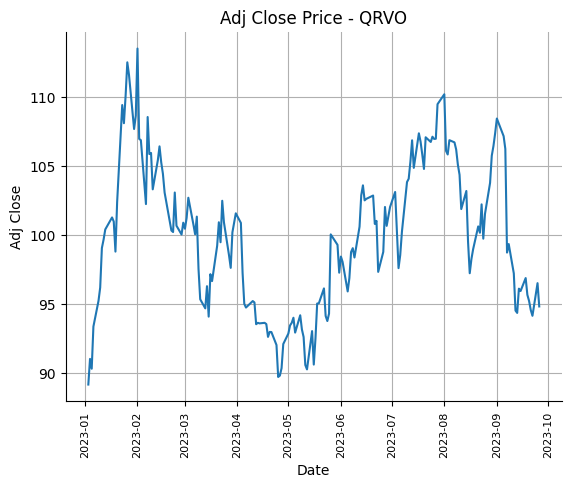

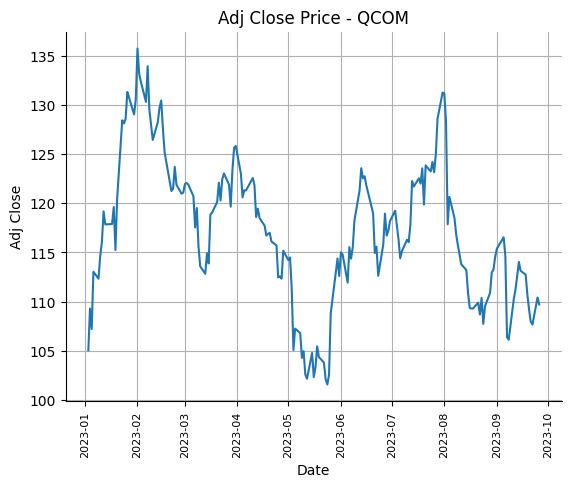

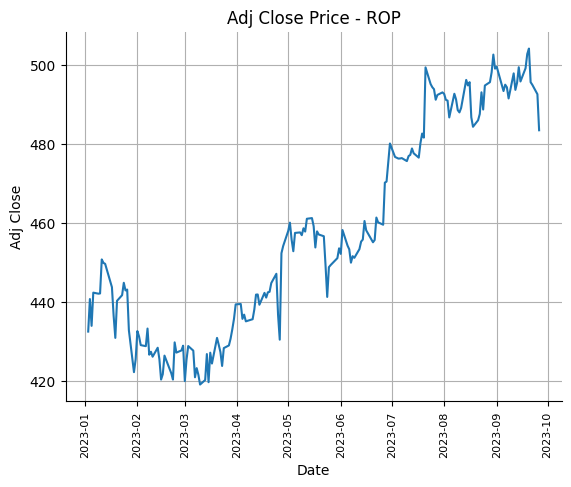

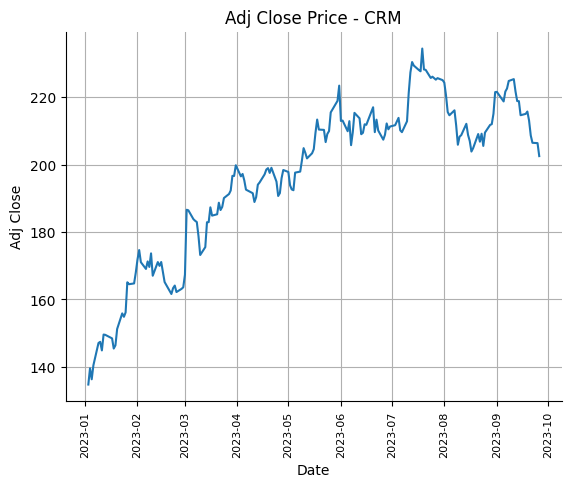

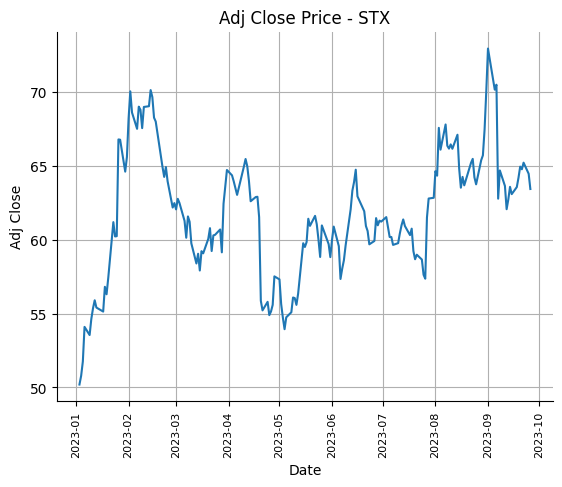

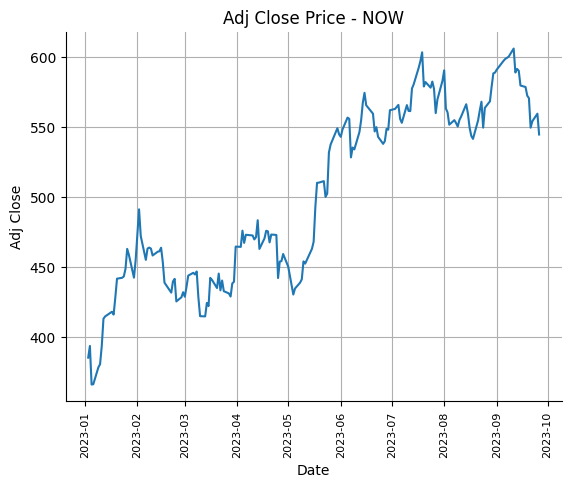

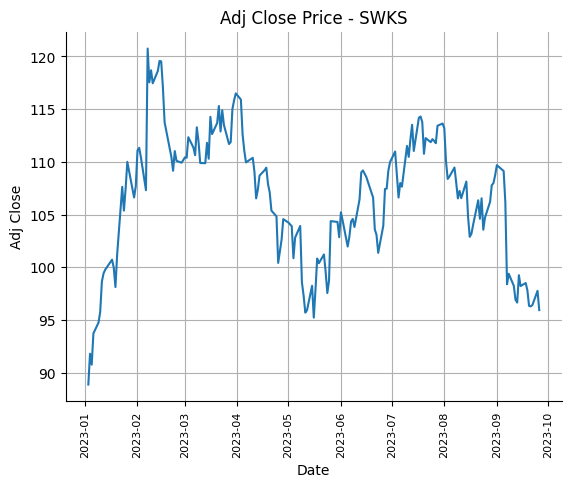

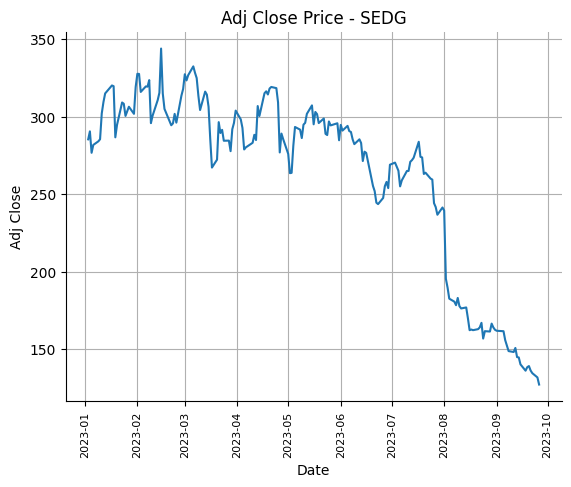

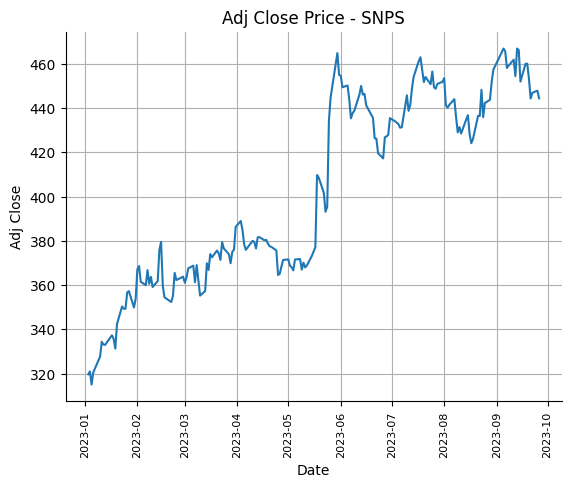

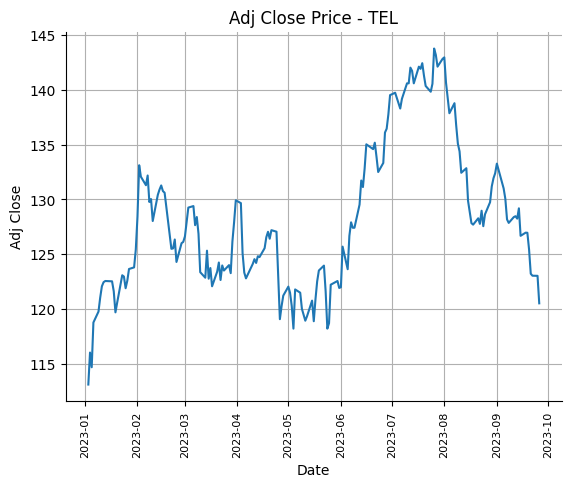

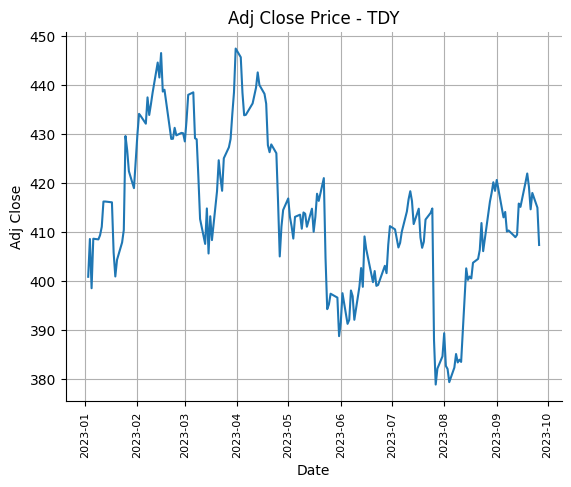

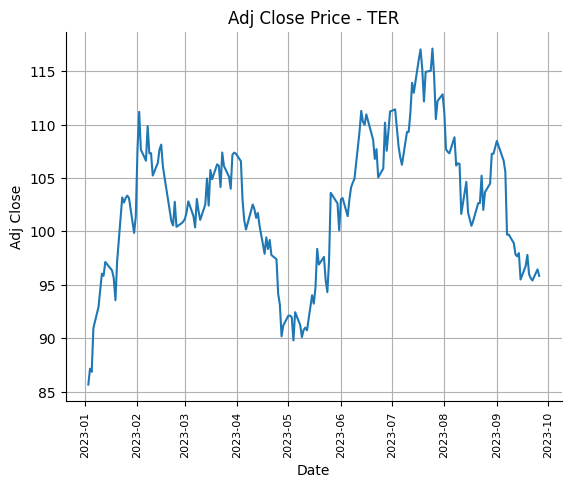

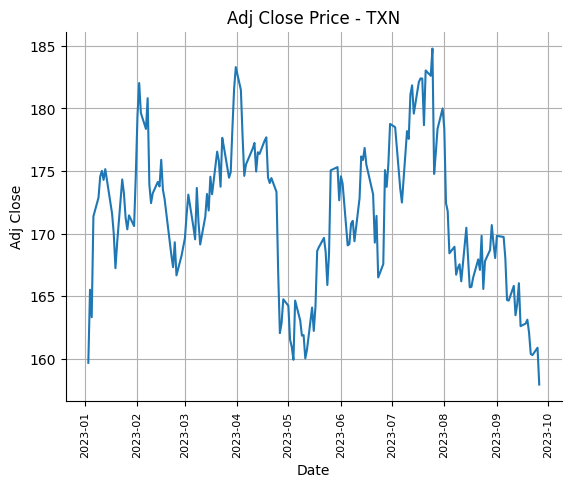

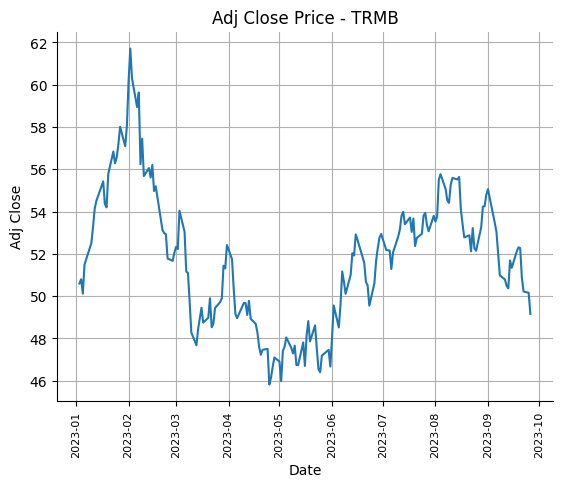

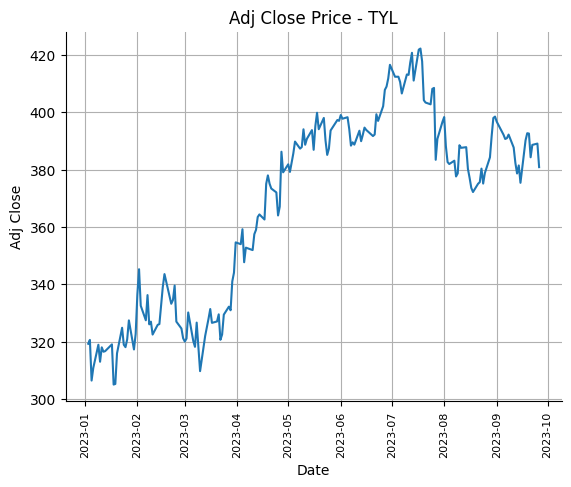

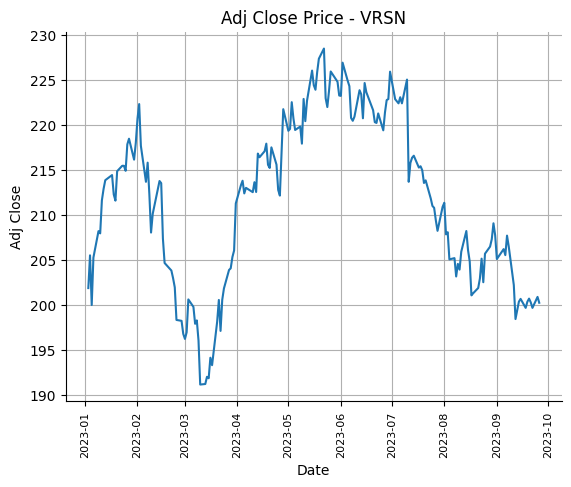

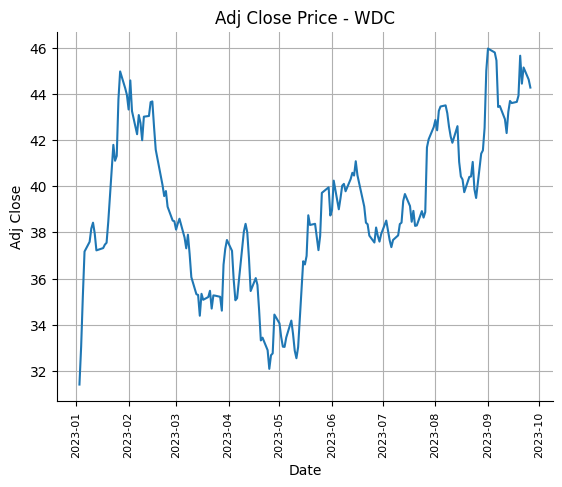

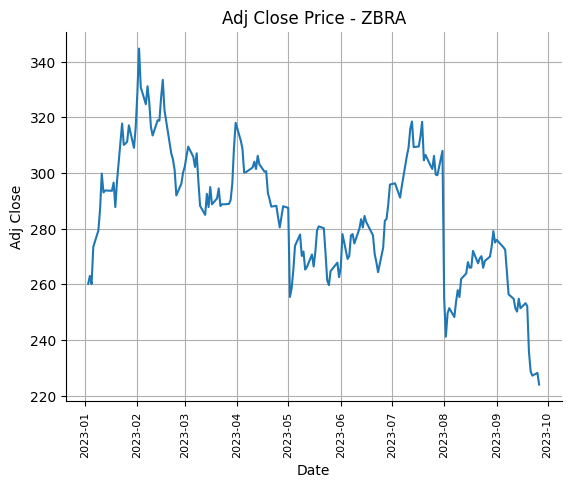

In [8]:
for symbol in sp500.query("GICS_Sector == 'Information Technology'")['Symbol']:
    plot_stock_ticker(symbol,'2023-01-01',end_date_str)
    time.sleep(2)

#### Plotting multiple stock tickers for specific industry ("Industrials")

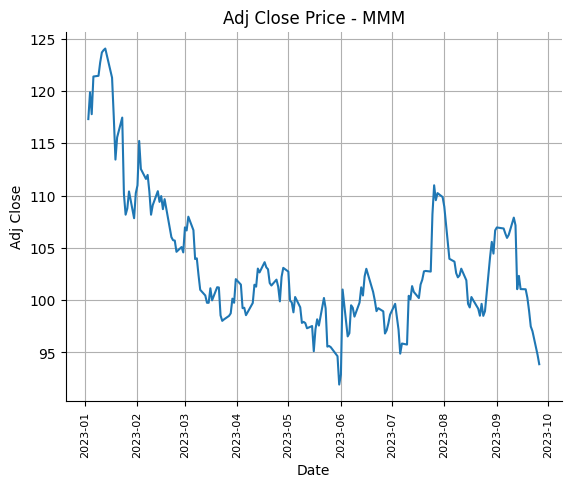

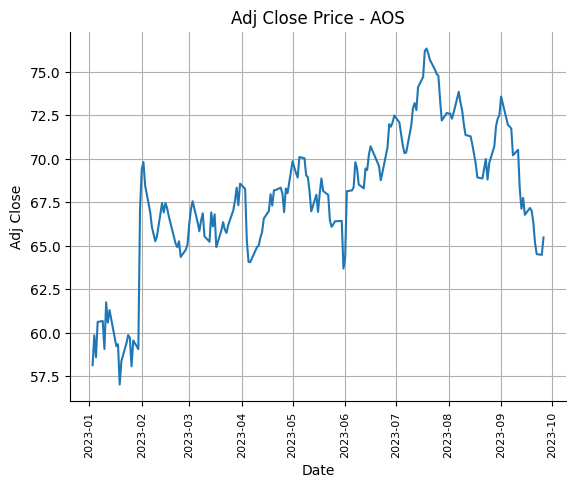

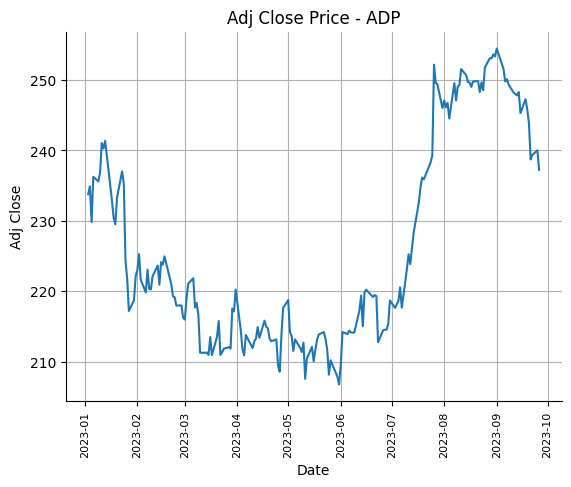

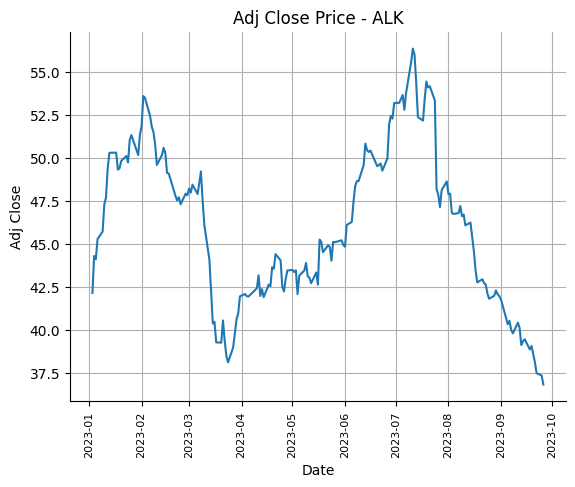

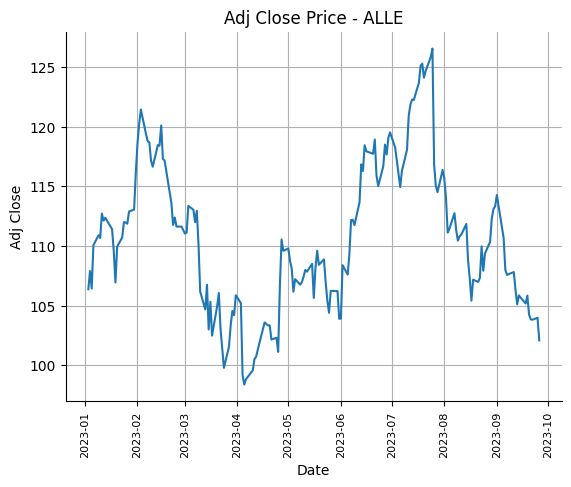

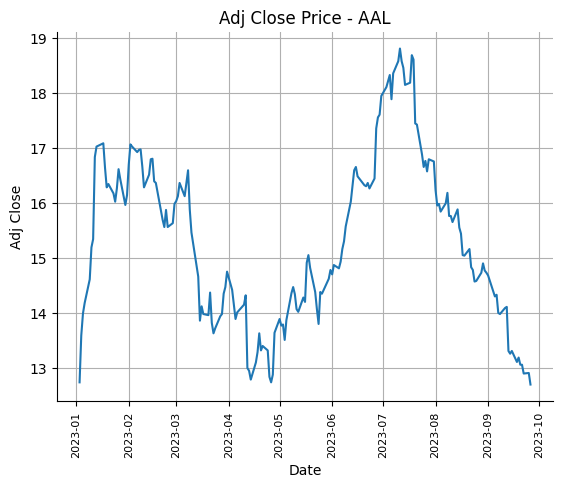

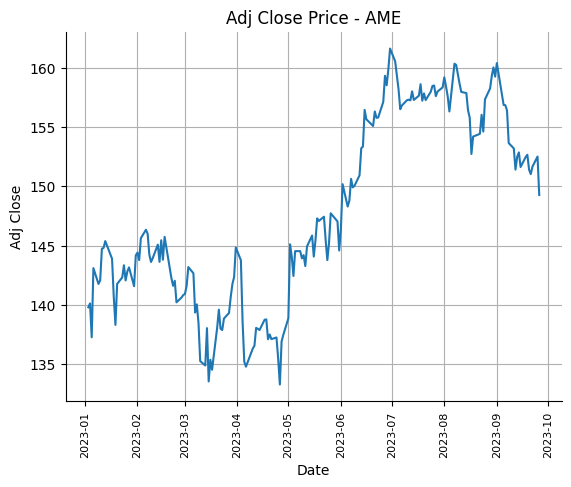

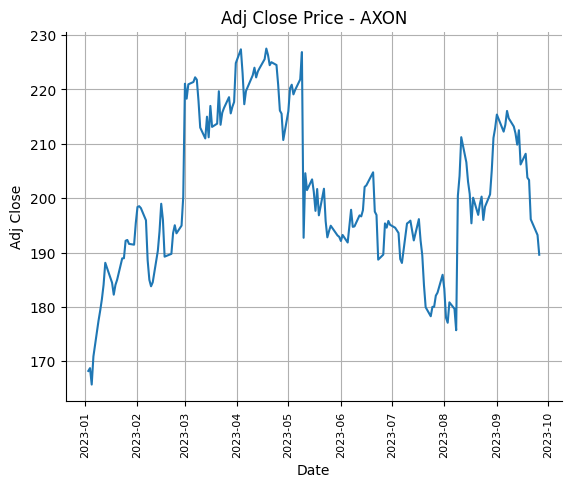

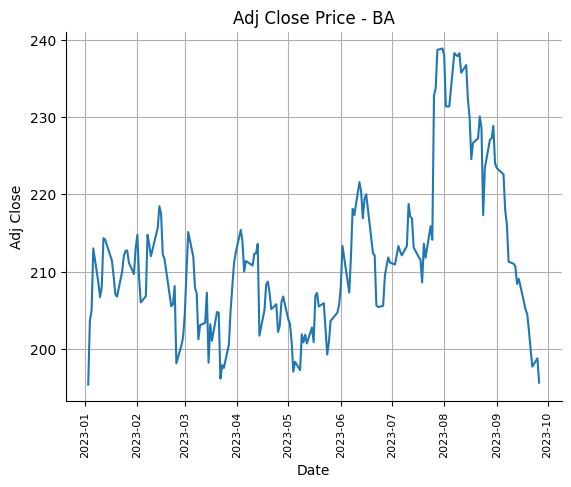

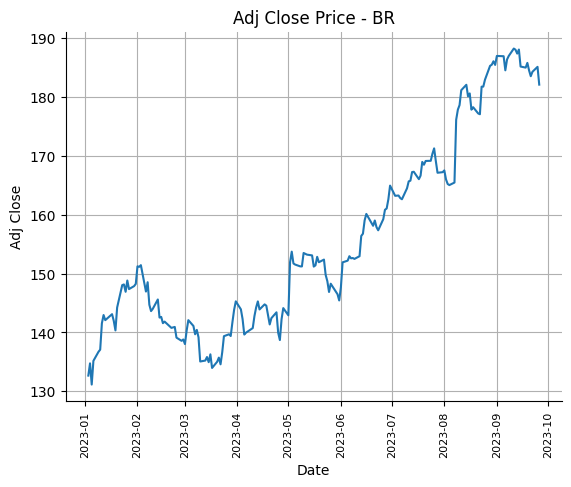

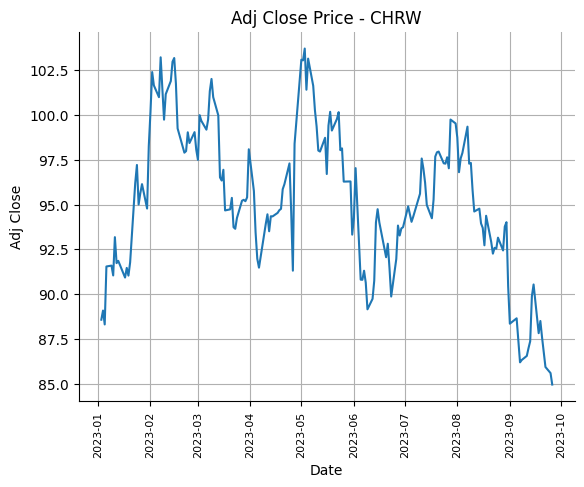

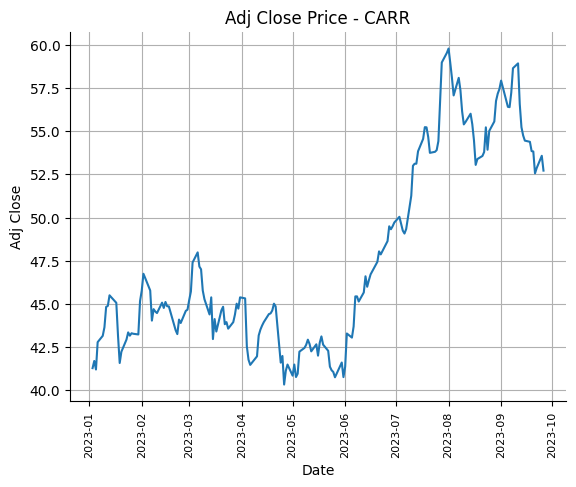

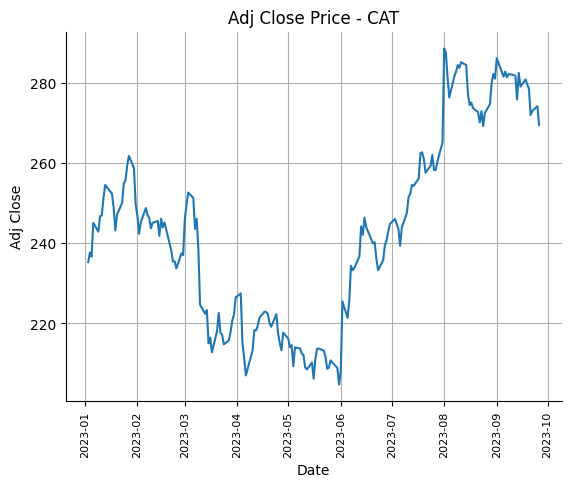

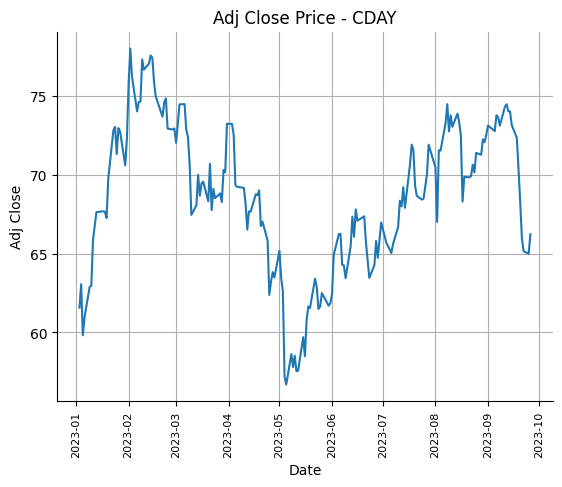

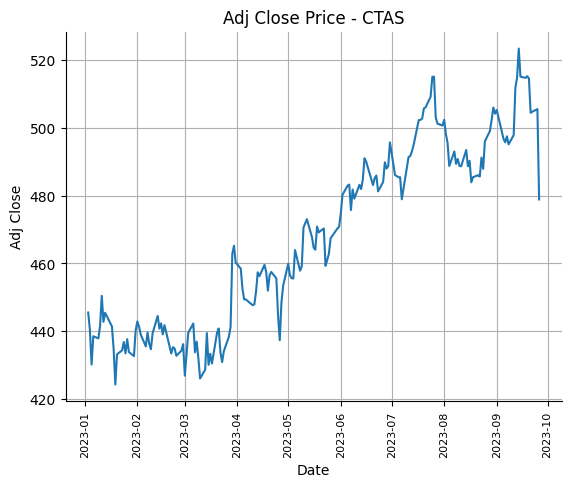

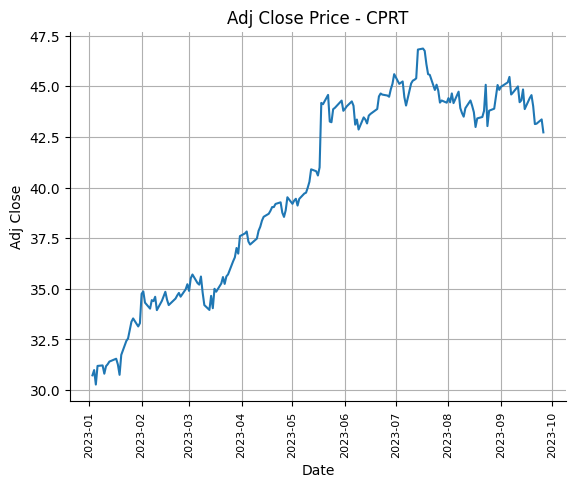

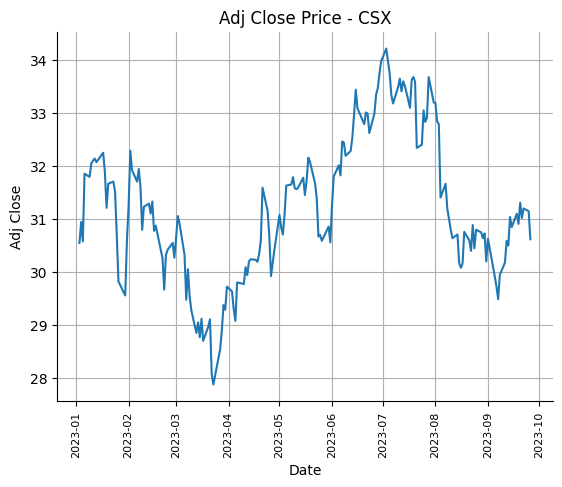

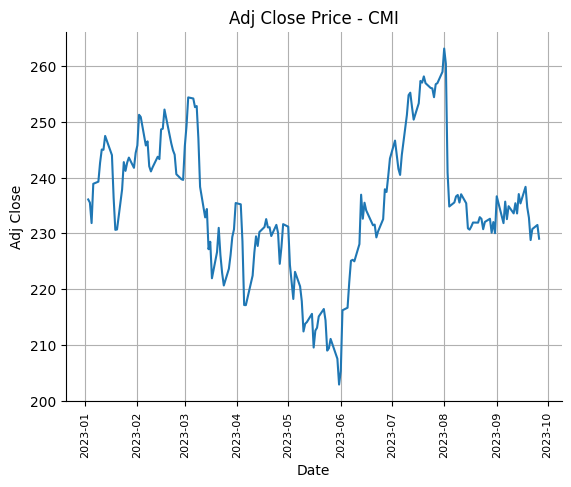

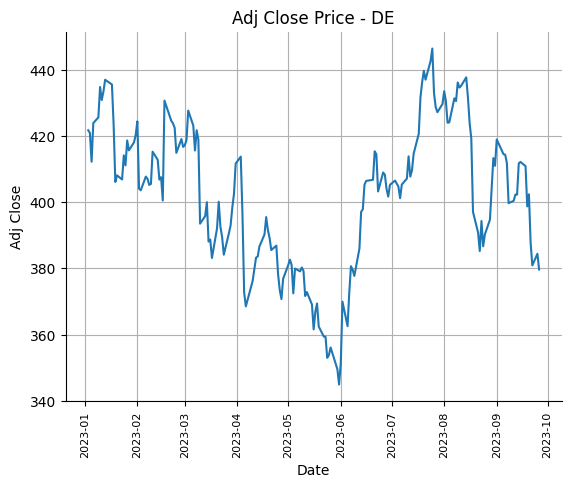

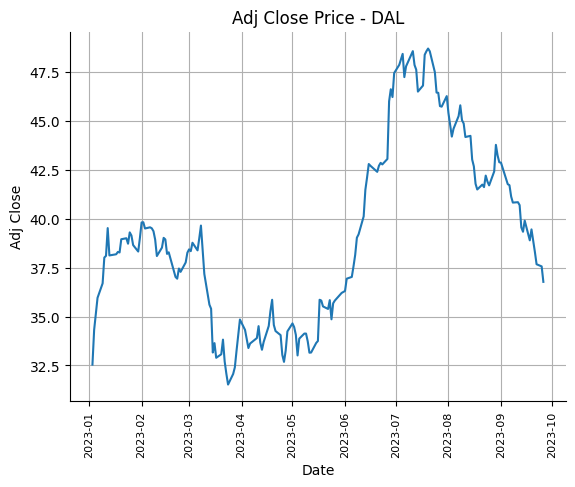

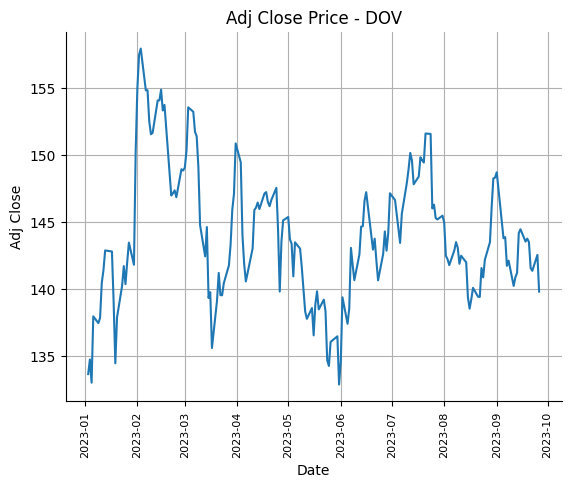

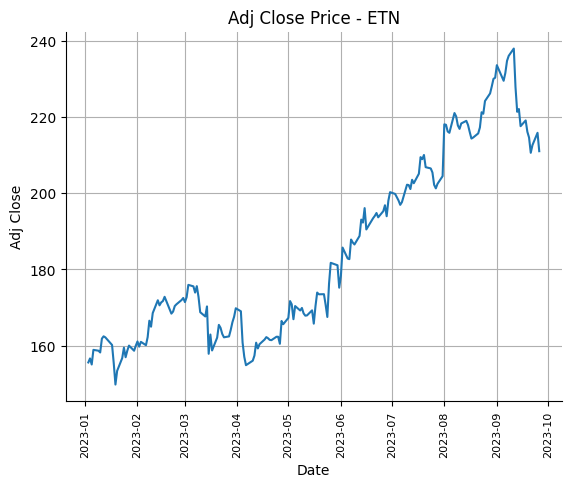

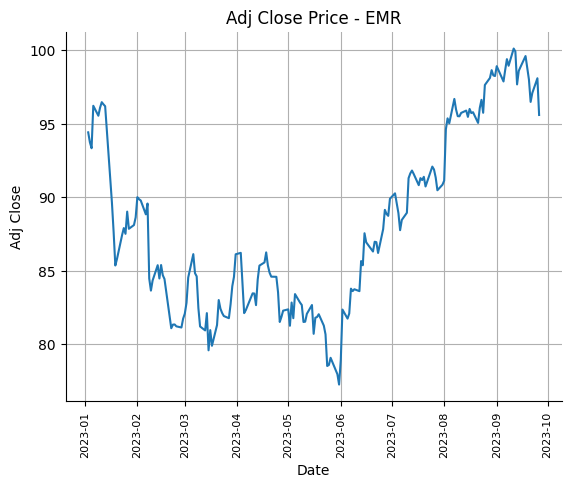

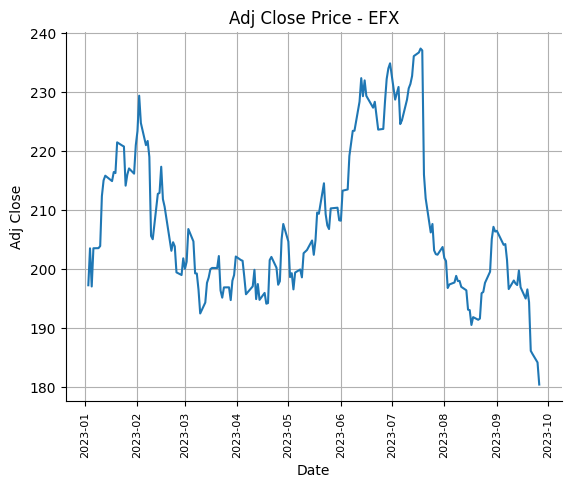

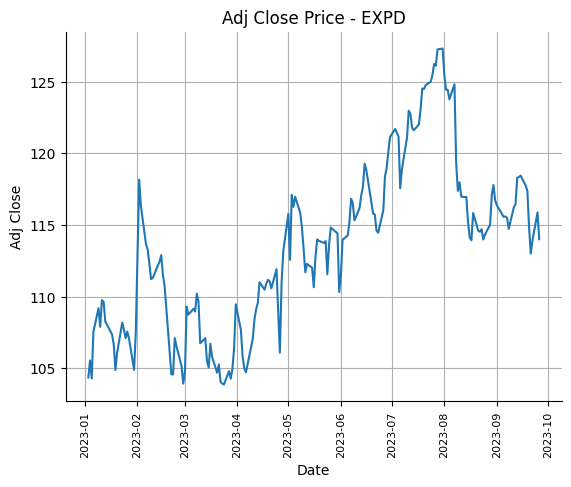

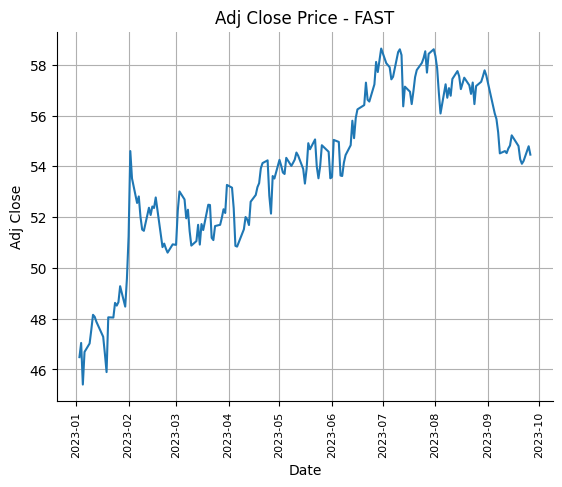

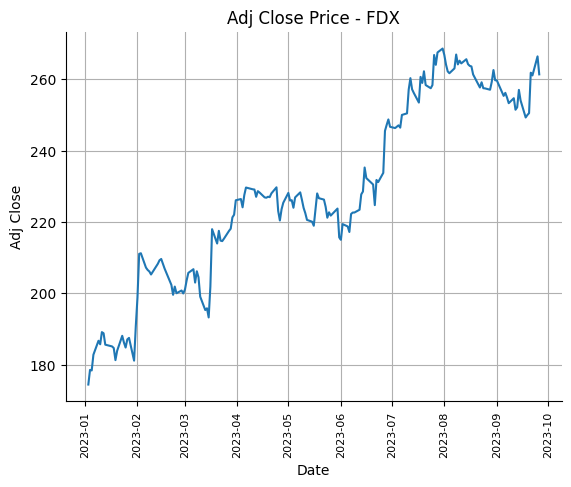

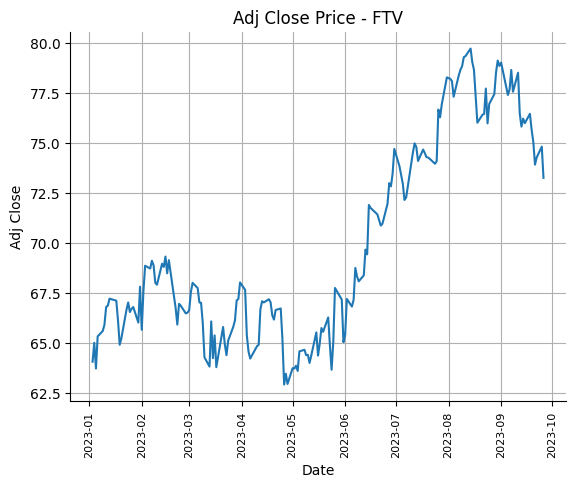

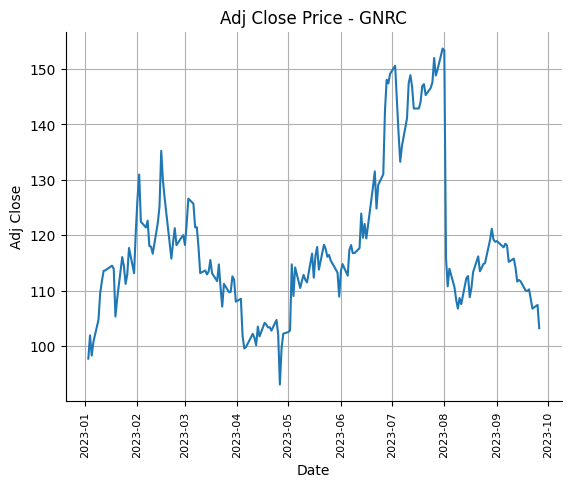

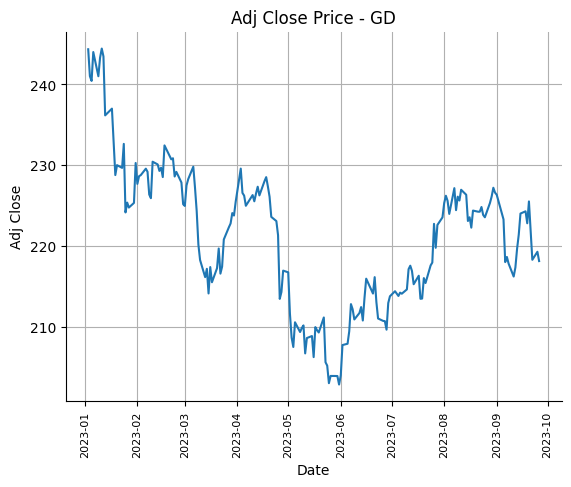

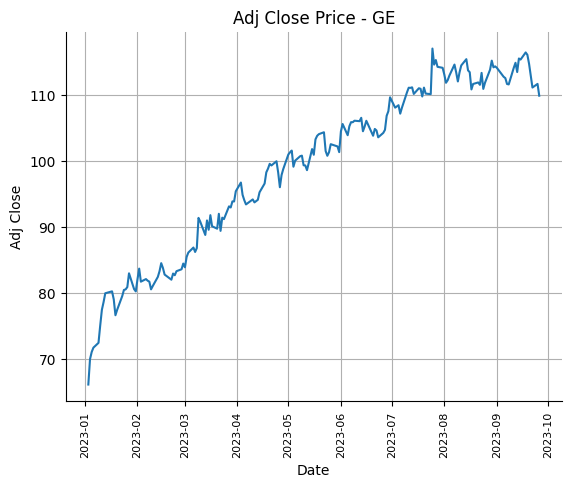

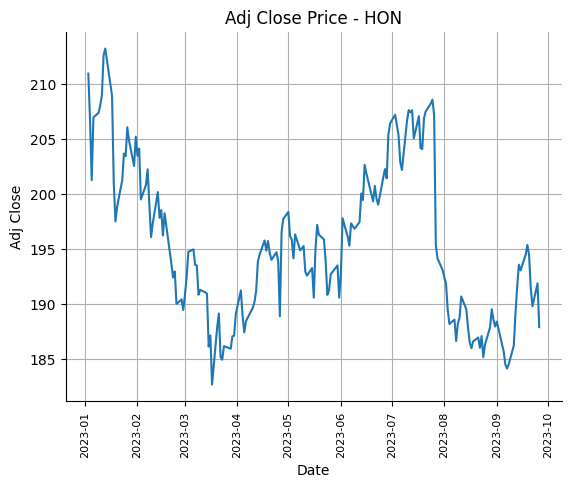

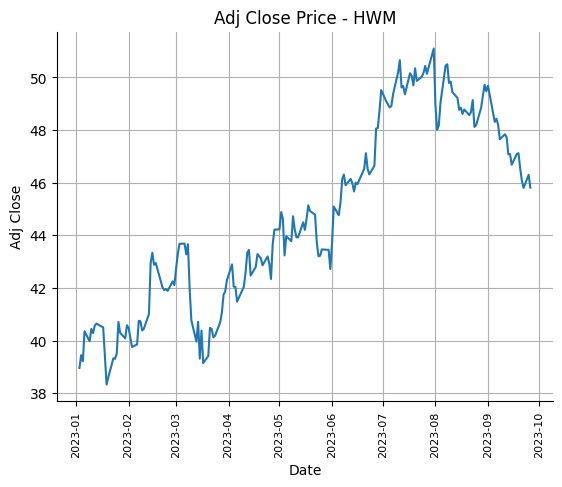

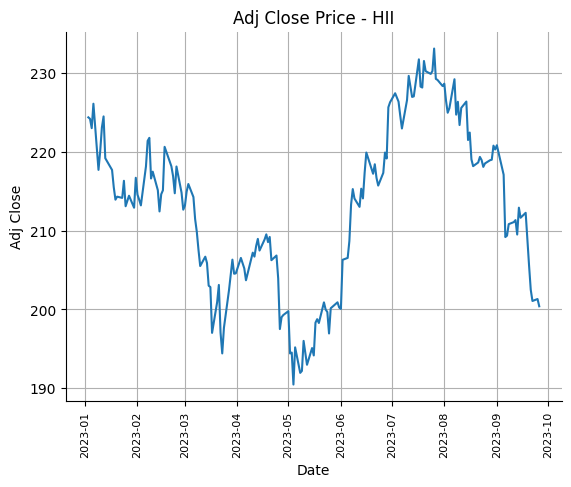

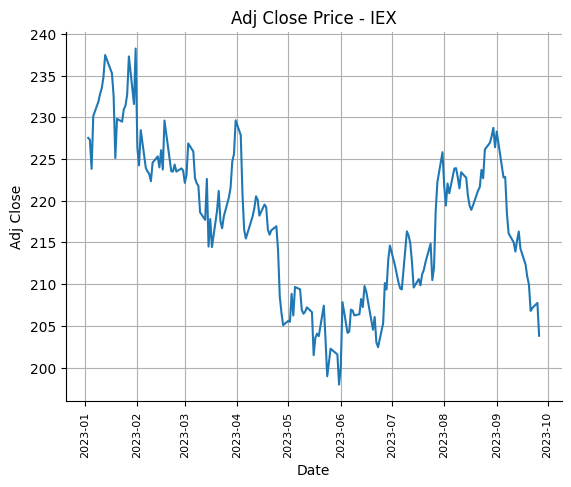

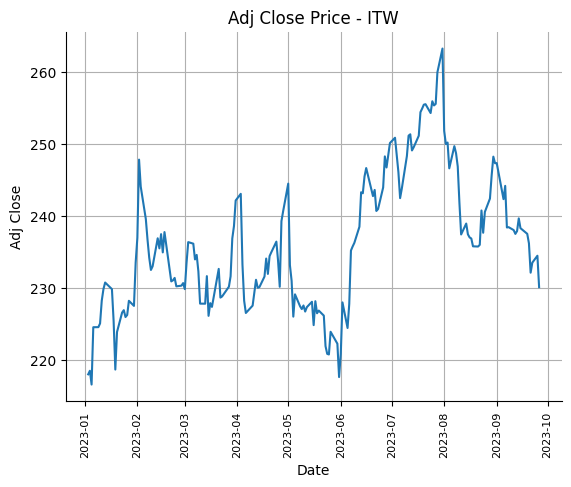

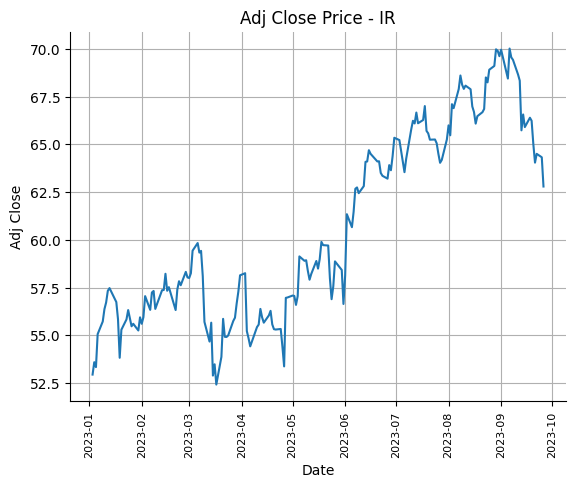

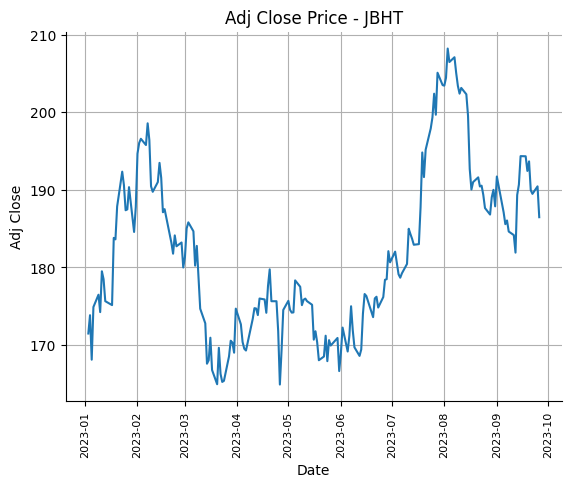

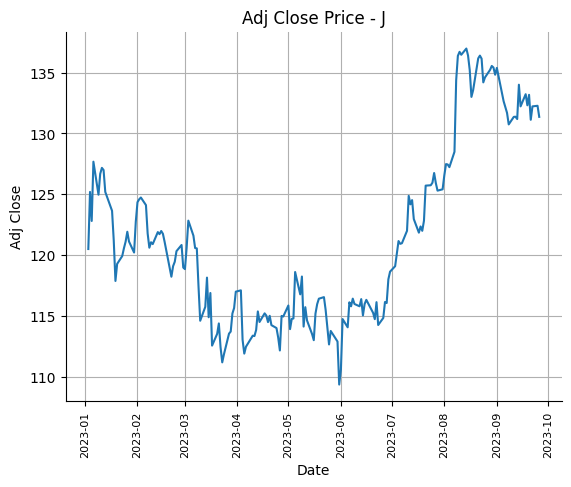

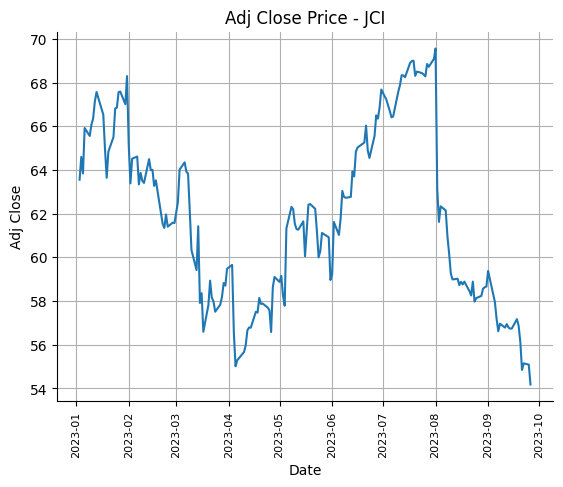

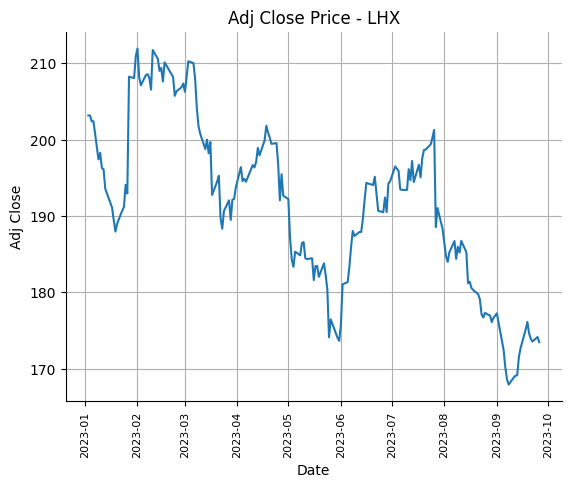

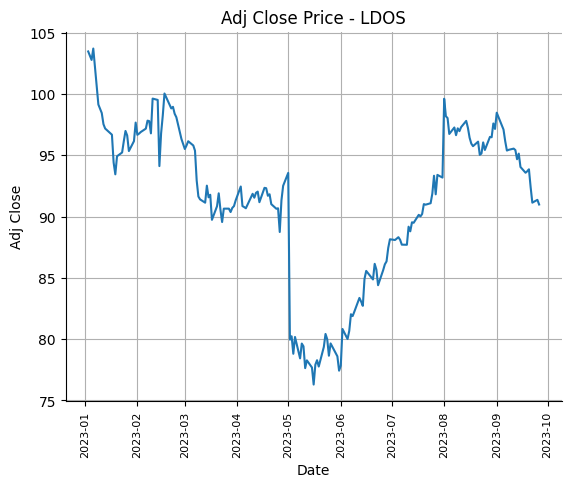

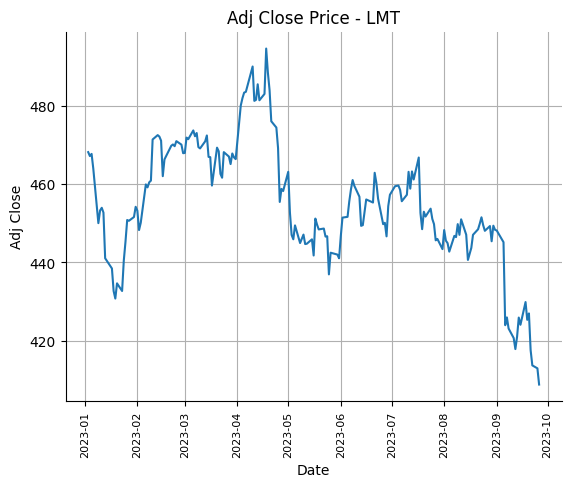

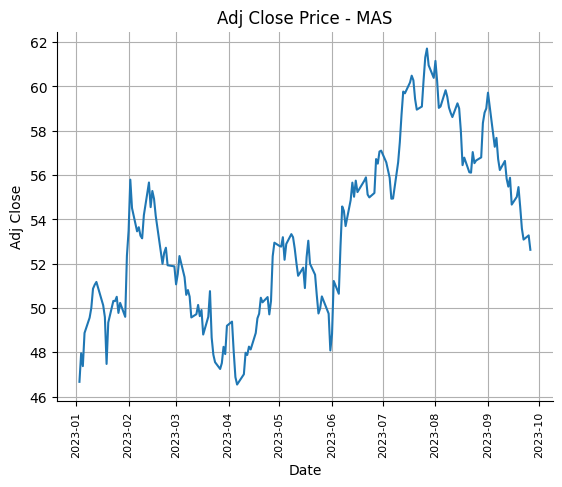

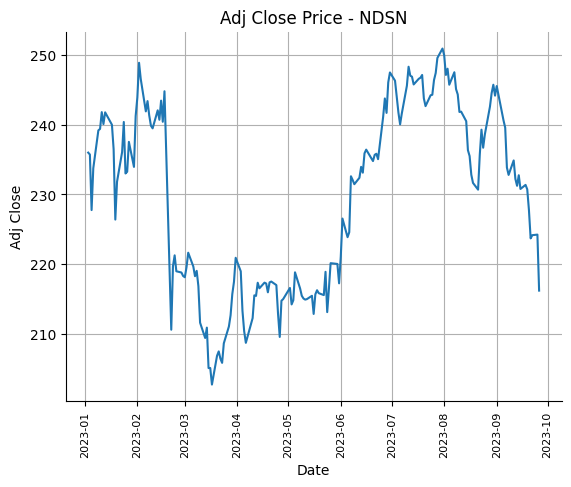

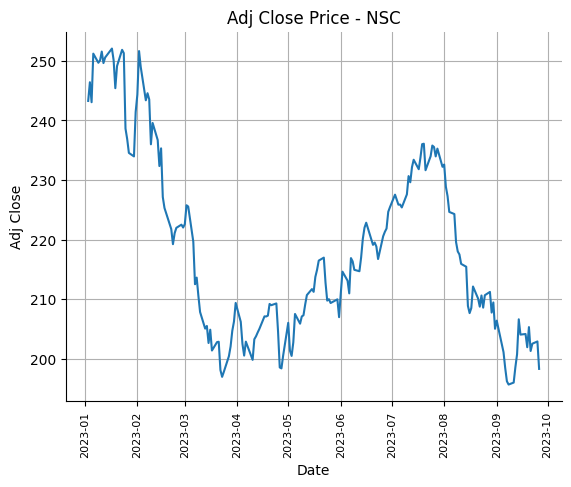

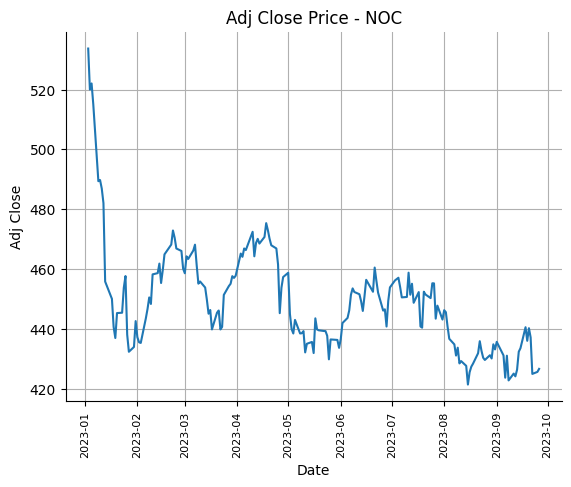

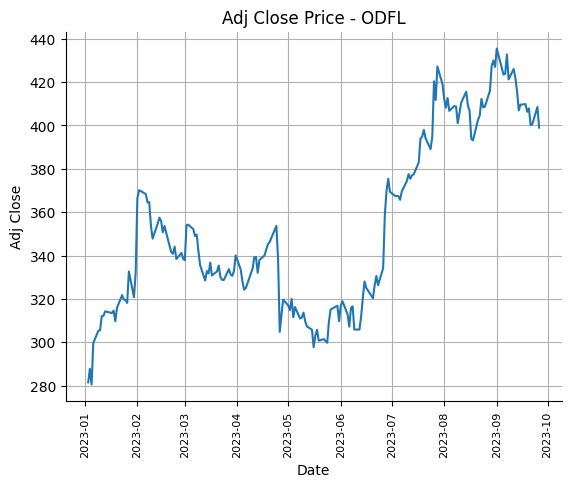

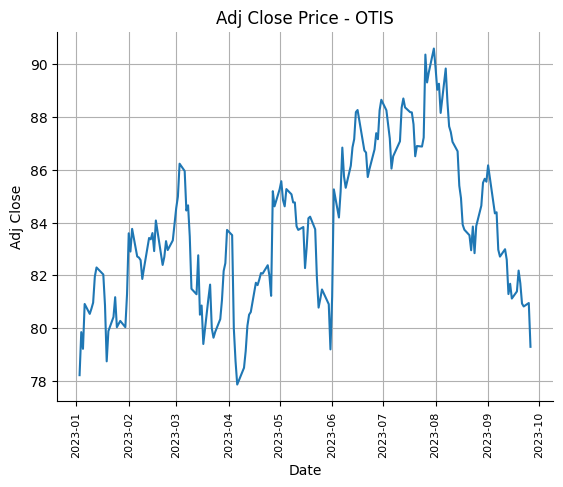

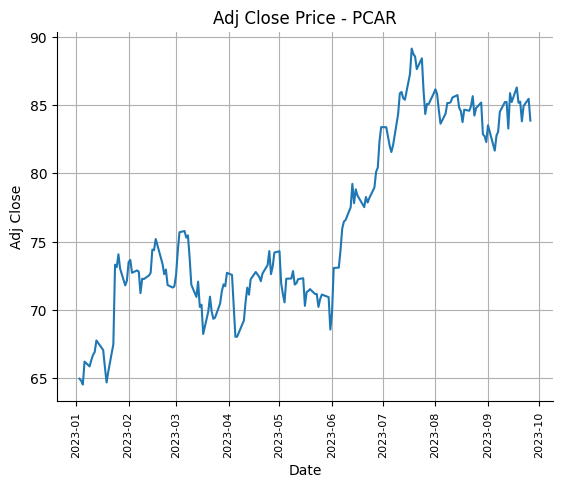

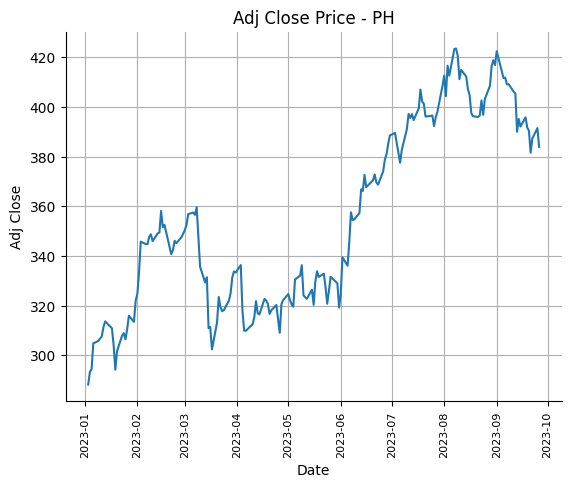

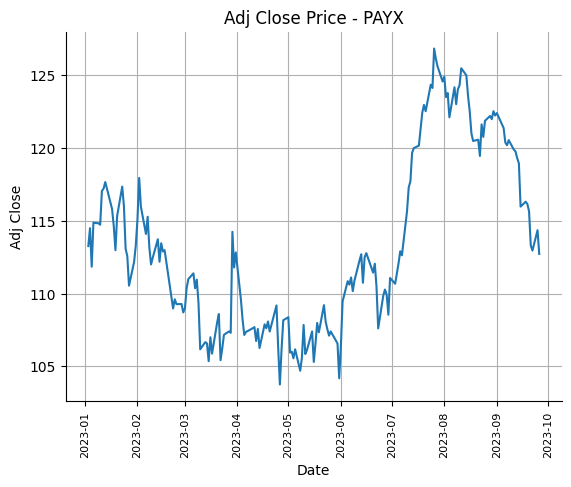

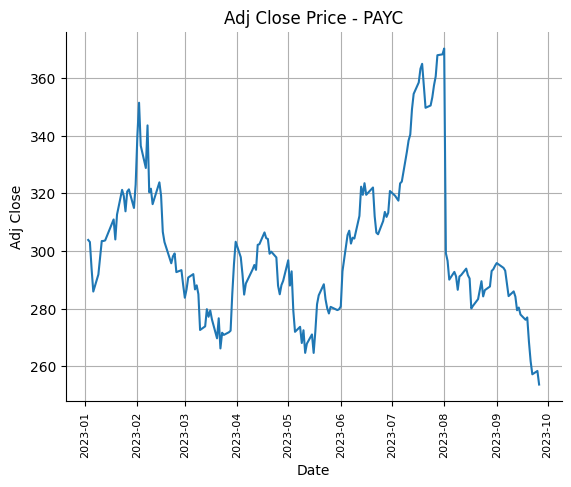

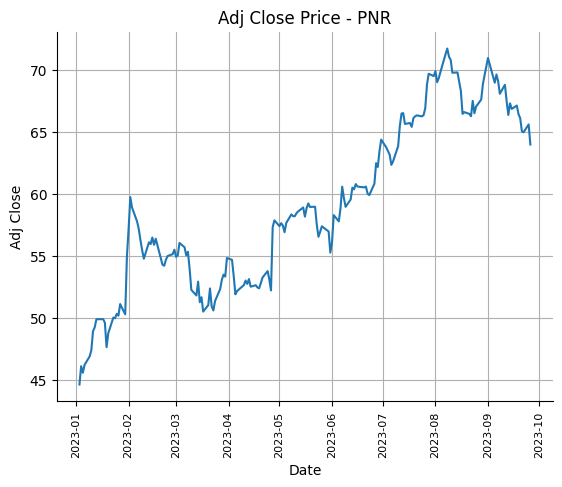

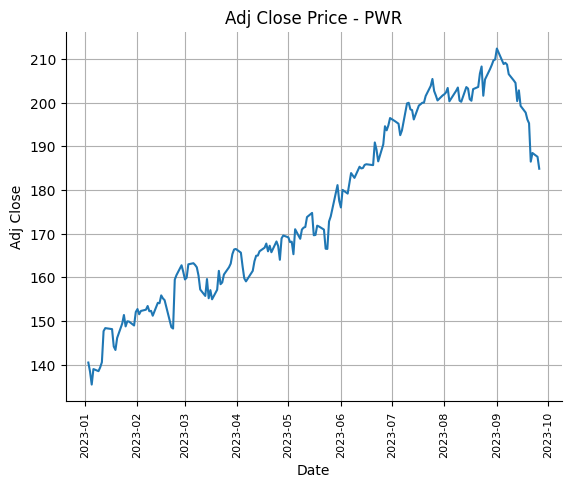

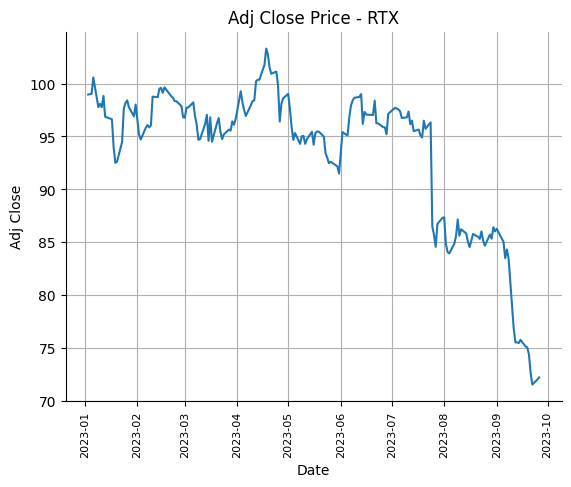

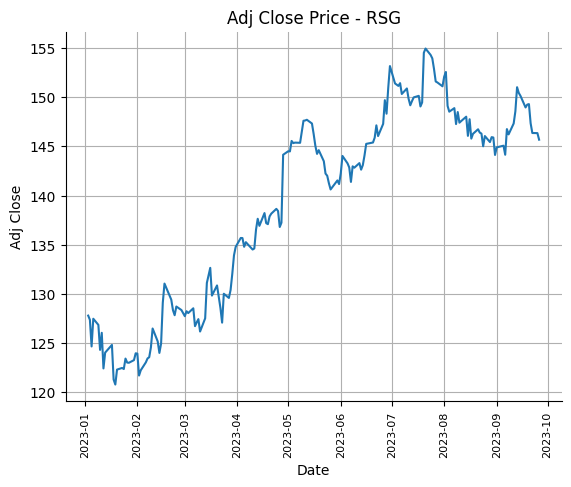

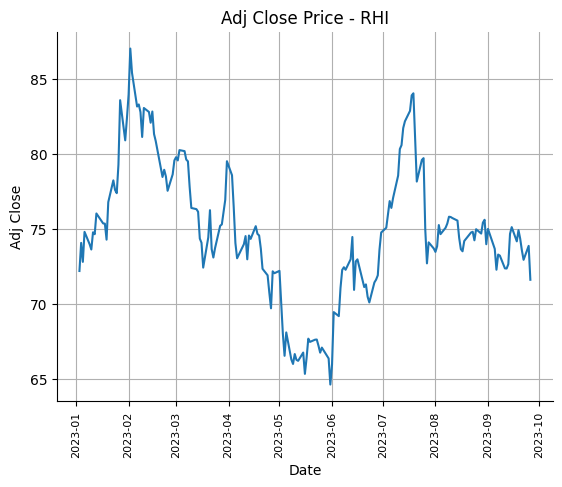

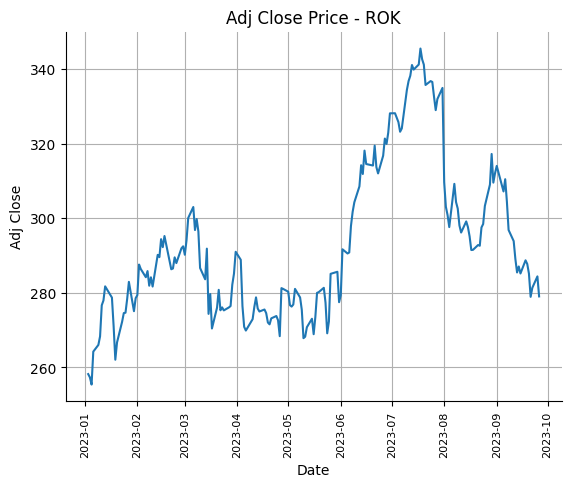

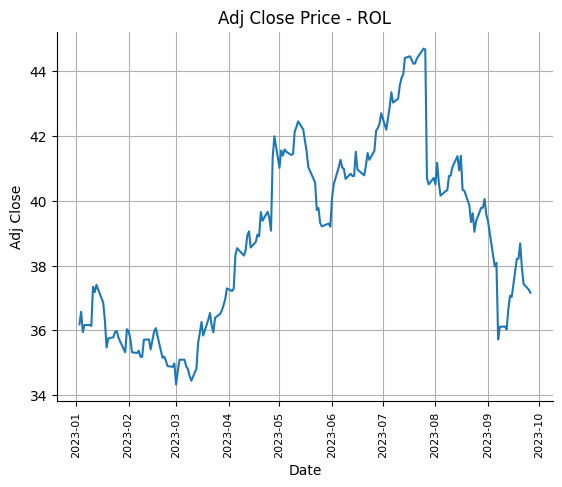

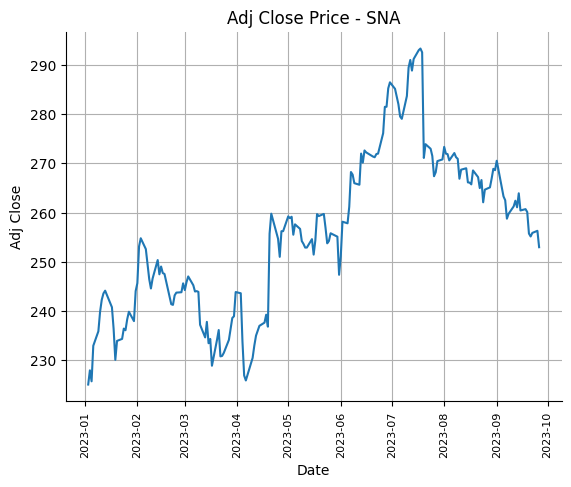

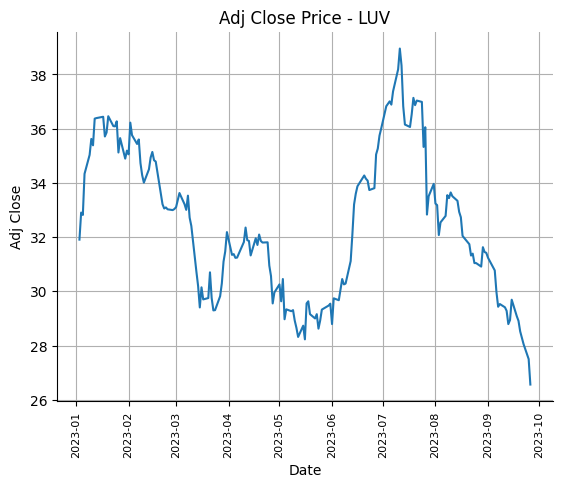

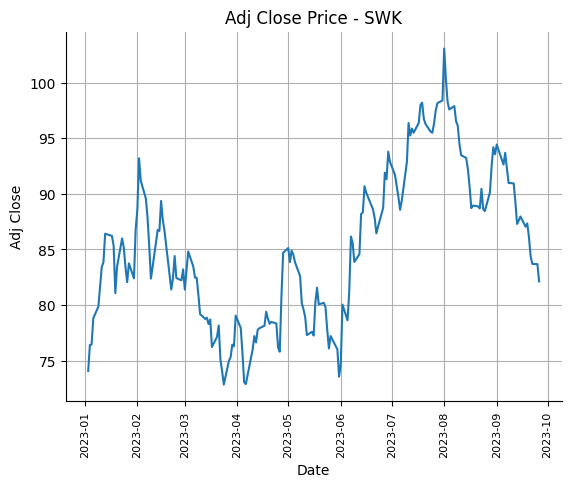

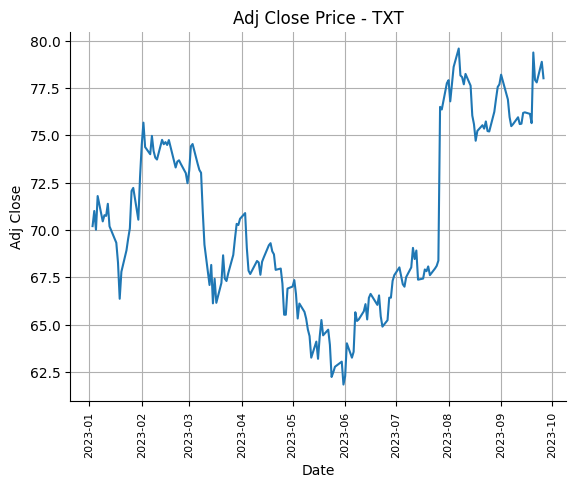

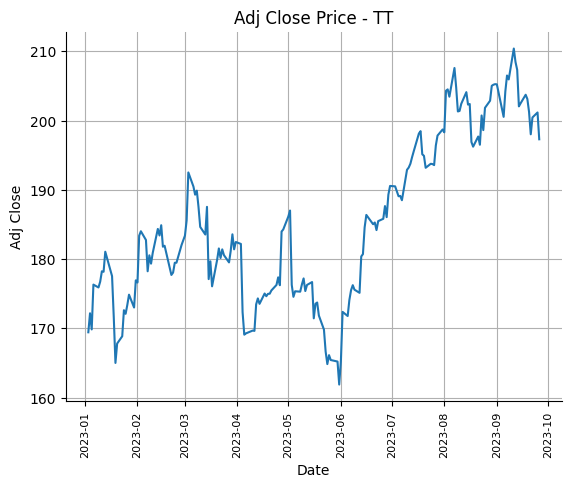

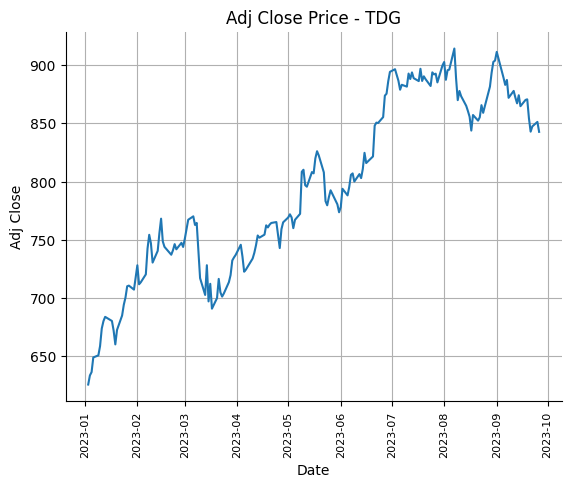

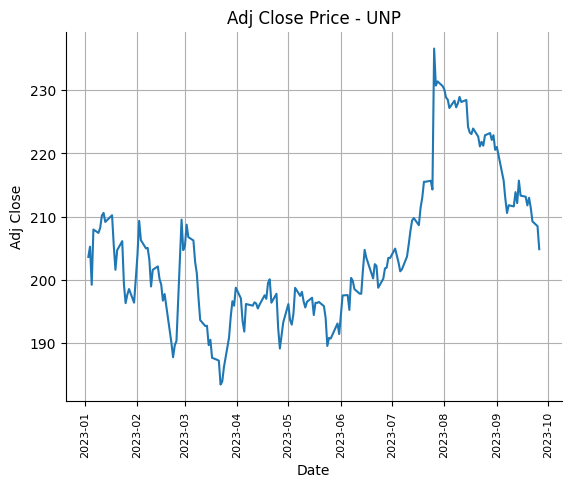

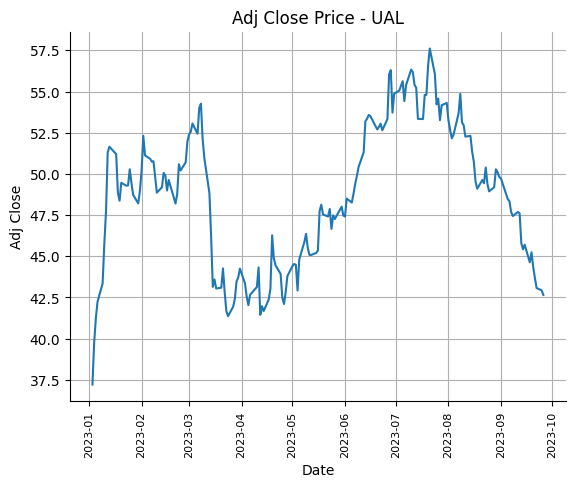

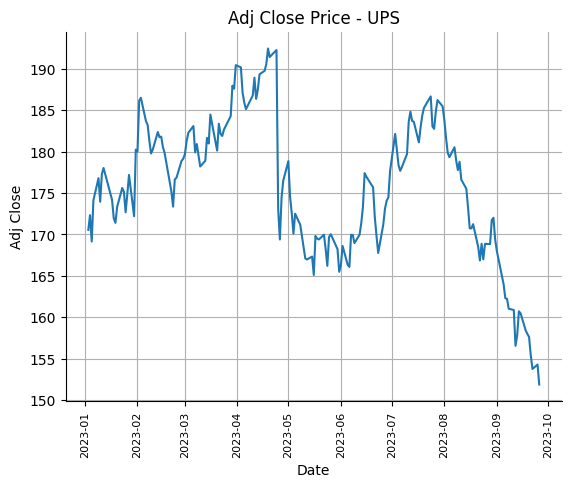

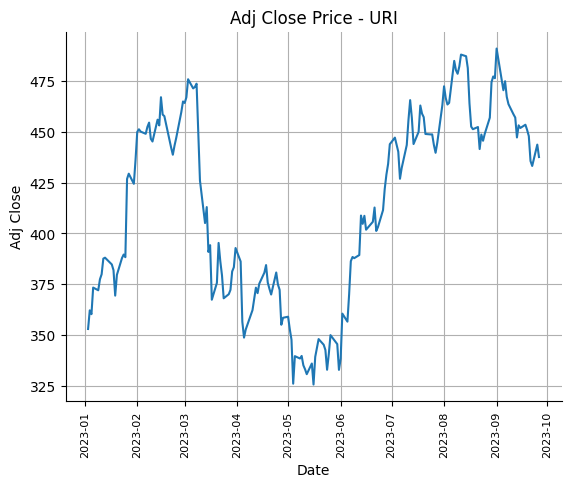

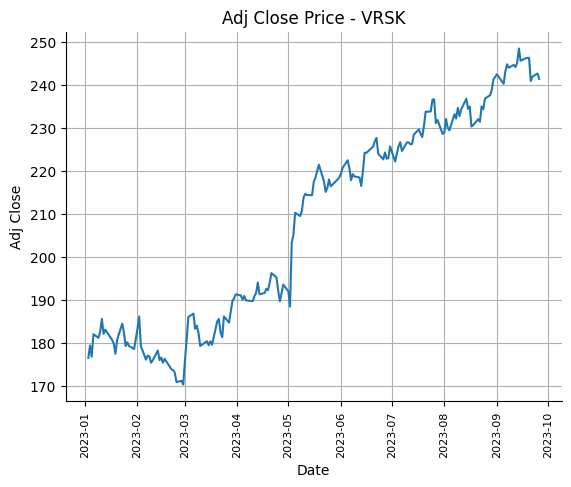

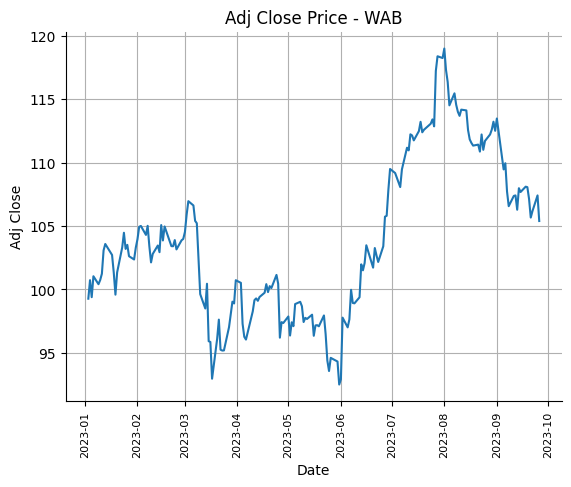

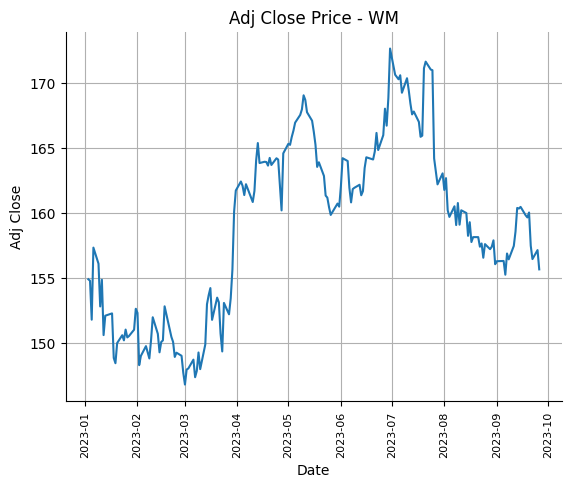

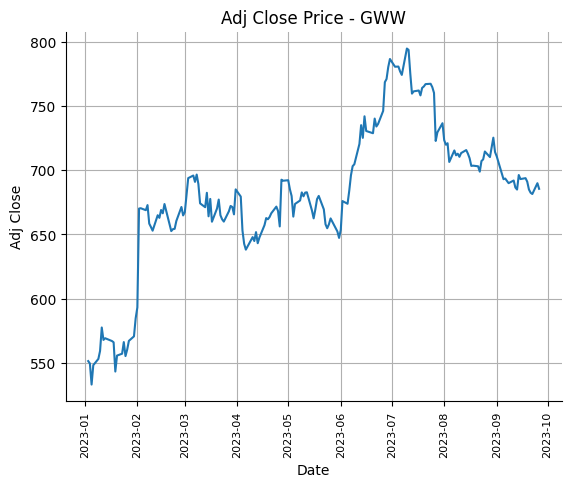

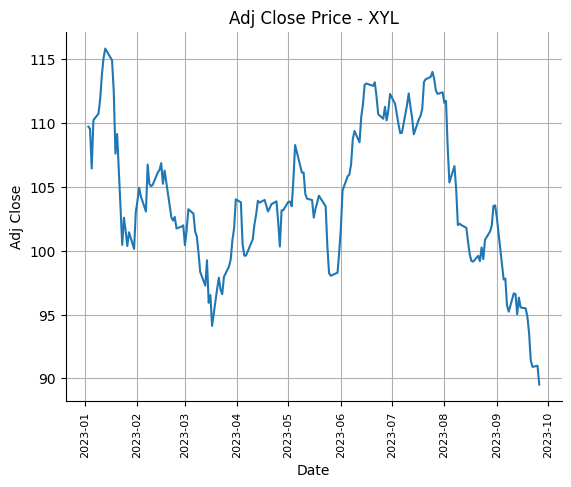

In [10]:
for symbol in sp500.query("GICS_Sector == 'Industrials'")['Symbol']:
    plot_stock_ticker(symbol,'2023-01-01',end_date_str)
    time.sleep(2)